In [689]:
import pandas as pd

data = pd.read_csv(r'C:\Users\kimye\OneDrive\바탕 화면\sba\lending_club_loan_two (1).csv')
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [690]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# 완납/체납자 비율

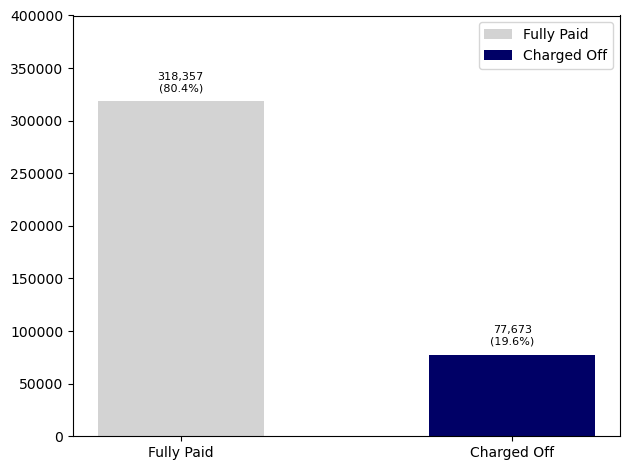

In [691]:
import matplotlib.pyplot as plt

fully_paid = len(data[data['loan_status'] == 'Fully Paid'])
charged_off = len(data[data['loan_status'] == 'Charged Off'])
total_loans = fully_paid + charged_off

fig, ax = plt.subplots()

bar_labels = ['Fully Paid', 'Charged Off']
bar_heights = [fully_paid, charged_off]
bar_colors = ['lightgray',  '#000066']

bar_container = ax.bar(bar_labels, bar_heights, color=bar_colors, width=0.5, label=bar_labels)
# ax.set_ylabel('Number of Loans')
# ax.set_title('Loan Status Distribution')
ax.set_ylim(0, 400000)

# Function to add percentage labels
def add_percentage_labels():
    for i, bar in enumerate(bar_container):
        height = bar.get_height()
        ax.annotate('{:,.0f}\n({:.1%})'.format(height, height/total_loans), 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 7), textcoords='offset points', ha='center', fontsize=8)

add_percentage_labels()

ax.legend()

# Add space above the bars for the percentage labels
ax.margins(y=0.1)

plt.tight_layout()  # Adjust layout to make room for percentage labels
plt.show()

# 결측치 제거
1) revol_util : 결측치 276개로 전체 데이터의 약 0.07%이기 때문에 제거하기로 결정
2) pub_rec_bankruptcies : 결측치 535개로 전체 데이터의 약 0.13%이기 때문에 제거하기로 결정

In [692]:
data.dropna(subset=['revol_util'], inplace=True)
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   emp_title             372338 non-null  object 
 7   emp_length            376929 non-null  object 
 8   home_ownership        395219 non-null  object 
 9   annual_inc            395219 non-null  float64
 10  verification_status   395219 non-null  object 
 11  issue_d               395219 non-null  object 
 12  loan_status           395219 non-null  object 
 13  purpose               395219 non-null  object 
 14  title                 393464 non-null  object 
 15  dti  

# 이상치 제거

## dti

{'whiskers': [<matplotlib.lines.Line2D at 0x1b4156b2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b4156b3f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3f18c43d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b4156b9590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3a0203450>],
 'means': []}

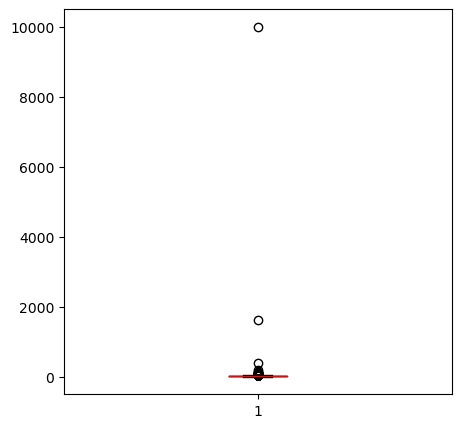

In [694]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['dti'], medianprops=medianprops)

In [695]:
Q1 = data['dti'].quantile(q=0.25)
Q3 = data['dti'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['dti']>upper) | (data['dti']<lower)]))

outliers = data.loc[(data['dti']>upper) | (data['dti']<lower), 'dti'].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  11


In [696]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395208 entries, 0 to 395207
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395208 non-null  float64
 1   term                  395208 non-null  object 
 2   int_rate              395208 non-null  float64
 3   installment           395208 non-null  float64
 4   grade                 395208 non-null  object 
 5   sub_grade             395208 non-null  object 
 6   emp_title             372334 non-null  object 
 7   emp_length            376925 non-null  object 
 8   home_ownership        395208 non-null  object 
 9   annual_inc            395208 non-null  float64
 10  verification_status   395208 non-null  object 
 11  issue_d               395208 non-null  object 
 12  loan_status           395208 non-null  object 
 13  purpose               395208 non-null  object 
 14  title                 393453 non-null  object 
 15  

## open_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3e0004790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3e0005f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3dfff7cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3e0007650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3e0010110>],
 'means': []}

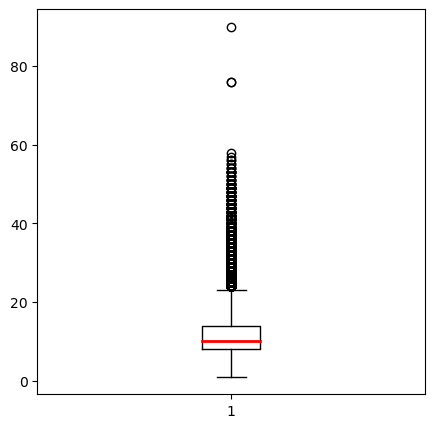

In [697]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['open_acc'], medianprops=medianprops)

In [698]:
Q1 = data['open_acc'].quantile(q=0.25)
Q3 = data['open_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)].index

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  88


In [699]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395120 entries, 0 to 395119
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395120 non-null  float64
 1   term                  395120 non-null  object 
 2   int_rate              395120 non-null  float64
 3   installment           395120 non-null  float64
 4   grade                 395120 non-null  object 
 5   sub_grade             395120 non-null  object 
 6   emp_title             372246 non-null  object 
 7   emp_length            376837 non-null  object 
 8   home_ownership        395120 non-null  object 
 9   annual_inc            395120 non-null  float64
 10  verification_status   395120 non-null  object 
 11  issue_d               395120 non-null  object 
 12  loan_status           395120 non-null  object 
 13  purpose               395120 non-null  object 
 14  title                 393365 non-null  object 
 15  

## pub_rec

In [700]:
len(data[data['pub_rec'] == 0])/len(data['pub_rec'])*100

85.39076736181414

C:\Users\kimye\AppData\Local\Temp\ipykernel_9012\14872365.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Before Outlier Removal')

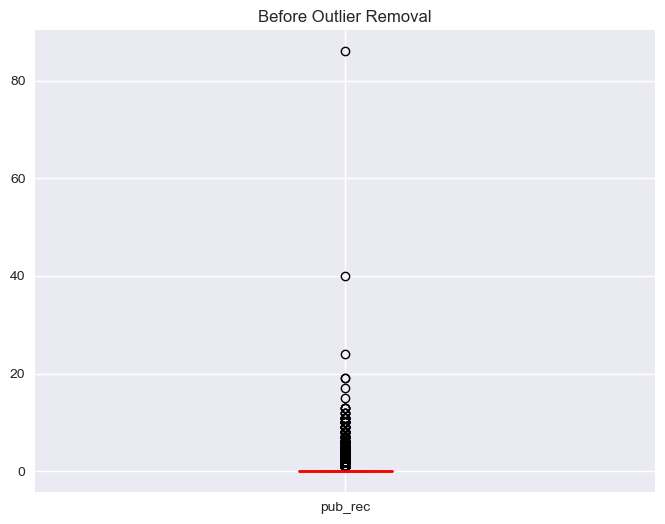

In [701]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 6))

medianprops = {'linewidth':2, 'color':'r'}
label = ['pub_rec']
ax.boxplot(data['pub_rec'], medianprops=medianprops, labels=label)
ax.set_title('Before Outlier Removal')

In [702]:
Q1 = data['pub_rec'].quantile(q=0.25)
Q3 = data['pub_rec'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

#이상치 값 정의
outliers = data.loc[(data['pub_rec']>upper) | (data['pub_rec']<lower)]

print('극단 이상치 개수: ', len(outliers))

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='pub_rec', ascending=False).head(2)
top_outliers['pub_rec']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

극단 이상치 개수:  57724


In [703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395118 entries, 0 to 395119
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395118 non-null  float64
 1   term                  395118 non-null  object 
 2   int_rate              395118 non-null  float64
 3   installment           395118 non-null  float64
 4   grade                 395118 non-null  object 
 5   sub_grade             395118 non-null  object 
 6   emp_title             372244 non-null  object 
 7   emp_length            376835 non-null  object 
 8   home_ownership        395118 non-null  object 
 9   annual_inc            395118 non-null  float64
 10  verification_status   395118 non-null  object 
 11  issue_d               395118 non-null  object 
 12  loan_status           395118 non-null  object 
 13  purpose               395118 non-null  object 
 14  title                 393363 non-null  object 
 15  dti  

## revol_bal

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3e00ac790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3e00aded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3e00ac2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3e00af3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3e00afe50>],
 'means': []}

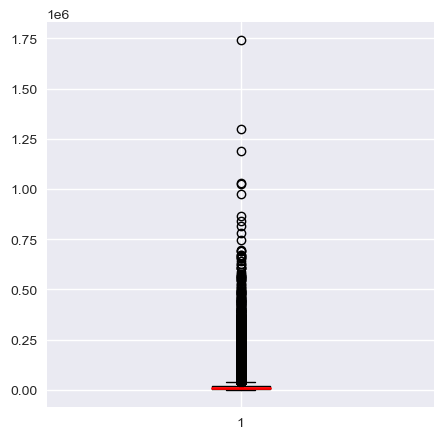

In [704]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_bal'], medianprops=medianprops)

In [705]:
Q1 = data['revol_bal'].quantile(q=0.25)
Q3 = data['revol_bal'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (10*IQR)
lower = Q1 - (10*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1136


In [706]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393982 entries, 0 to 393981
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393982 non-null  float64
 1   term                  393982 non-null  object 
 2   int_rate              393982 non-null  float64
 3   installment           393982 non-null  float64
 4   grade                 393982 non-null  object 
 5   sub_grade             393982 non-null  object 
 6   emp_title             371167 non-null  object 
 7   emp_length            375738 non-null  object 
 8   home_ownership        393982 non-null  object 
 9   annual_inc            393982 non-null  float64
 10  verification_status   393982 non-null  object 
 11  issue_d               393982 non-null  object 
 12  loan_status           393982 non-null  object 
 13  purpose               393982 non-null  object 
 14  title                 392239 non-null  object 
 15  

## revol_util

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3eca55f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3eca57650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3eca55b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3eca64c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3a02a3a10>],
 'means': []}

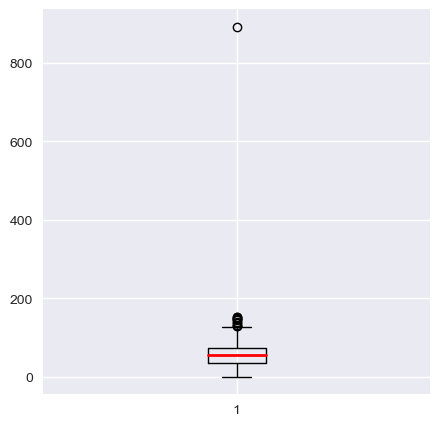

In [707]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_util'], medianprops=medianprops)

In [708]:
Q1 = data['revol_util'].quantile(q=0.25)
Q3 = data['revol_util'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 3*IQR
lower = Q1 - 3*IQR

print('극단 이상치 개수: ', len(data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1


In [709]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393981 entries, 0 to 393980
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393981 non-null  float64
 1   term                  393981 non-null  object 
 2   int_rate              393981 non-null  float64
 3   installment           393981 non-null  float64
 4   grade                 393981 non-null  object 
 5   sub_grade             393981 non-null  object 
 6   emp_title             371166 non-null  object 
 7   emp_length            375737 non-null  object 
 8   home_ownership        393981 non-null  object 
 9   annual_inc            393981 non-null  float64
 10  verification_status   393981 non-null  object 
 11  issue_d               393981 non-null  object 
 12  loan_status           393981 non-null  object 
 13  purpose               393981 non-null  object 
 14  title                 392238 non-null  object 
 15  

# 완납/체납자 평균 거래 금액 비교

In [710]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else x)

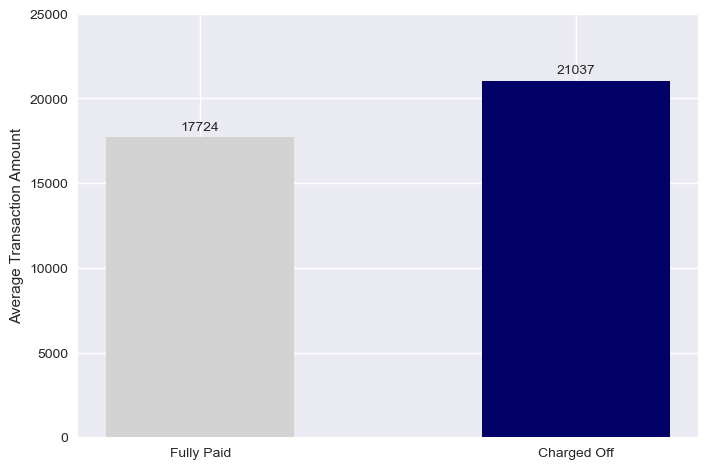

In [711]:
# 시각화
import matplotlib.pyplot as plt

data['total_amnt'] = data['term'] * data['installment']

# 완납한 사람들의 총 거래 금액(Fully Paid 총 거래 금액)
sum_fully_paid = data[data['loan_status'] == 'Fully Paid']['total_amnt'].sum()

# 체납한 사람들의 총 거래 금액(Charged Off 총 거래 금액)
sum_charged_off = data[data['loan_status'] == 'Charged Off']['total_amnt'].sum()

# 체납한 사람들의 수
len_charged_off = len(data[data['loan_status'] == 'Charged Off'])

# 완납한 사람들의 수
len_fully_paid = len(data[data['loan_status'] == 'Fully Paid'])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)), # 정수 형태로 표시
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots()

bar_labels = ['Fully Paid', 'Charged Off']
bar_heights = [sum_fully_paid/len_fully_paid, sum_charged_off/len_charged_off]
bar_colors = ['lightgray',  '#000066']

bar_container = ax.bar(bar_labels, bar_heights, color=bar_colors, width=0.5, label=bar_labels)
autolabel(bar_container)

ax.set_ylabel( "Average Transaction Amount")
# ax.set_title('Average Loan Amount by Customer Type')
ax.set_ylim(0, 25000)

plt.show()

# 대출 목적에 따른 체납 여부

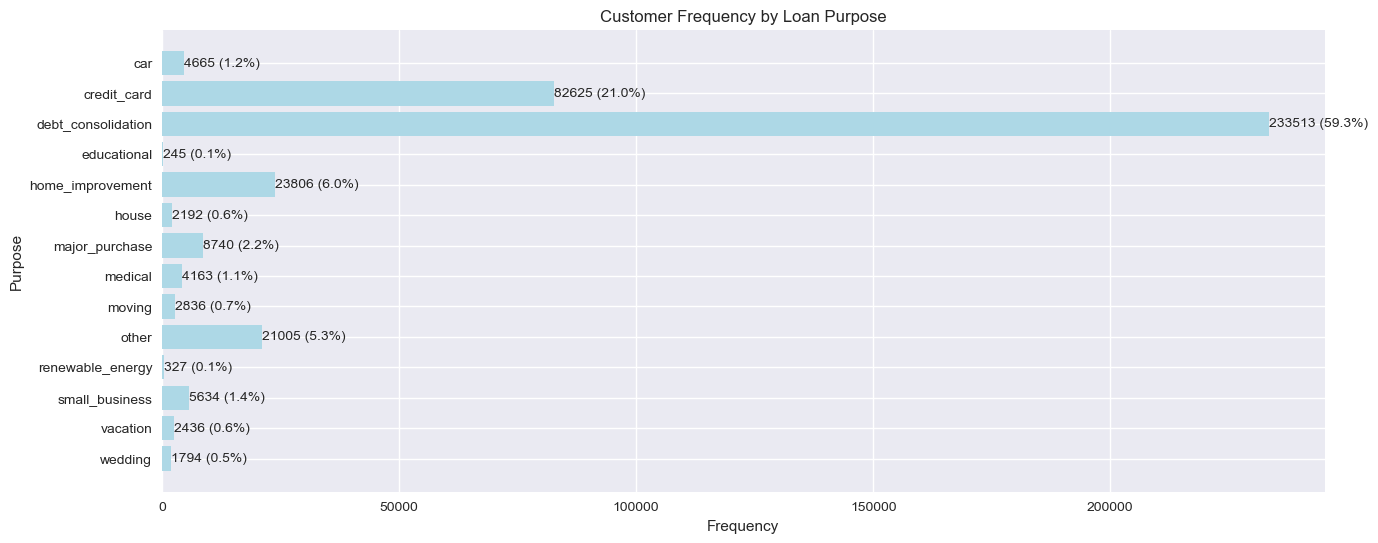

In [712]:
import matplotlib.pyplot as plt

# 데이터 그룹화
grouped_data = data.groupby('purpose').size()

# 바 차트 그리기
plt.figure(figsize=(15, 6))
bars = plt.barh(grouped_data.index, grouped_data.values, color='lightblue')

# 빈도수와 퍼센트 텍스트 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, 
             f'{width} ({width / grouped_data.sum() * 100:.1f}%)', 
             ha='left', va='center')

plt.title('Customer Frequency by Loan Purpose')
plt.xlabel('Frequency')
plt.ylabel('Purpose')
plt.gca().invert_yaxis()  # y 축 순서 반전

plt.show()


In [713]:
grouped_data = data.groupby(['purpose', 'loan_status']).size().unstack()
grouped_data

loan_status,Charged Off,Fully Paid
purpose,,
car,628,4037
credit_card,13830,68795
debt_consolidation,48481,185032
educational,40,205
home_improvement,4055,19751
house,434,1758
major_purchase,1438,7302
medical,903,3260
moving,666,2170


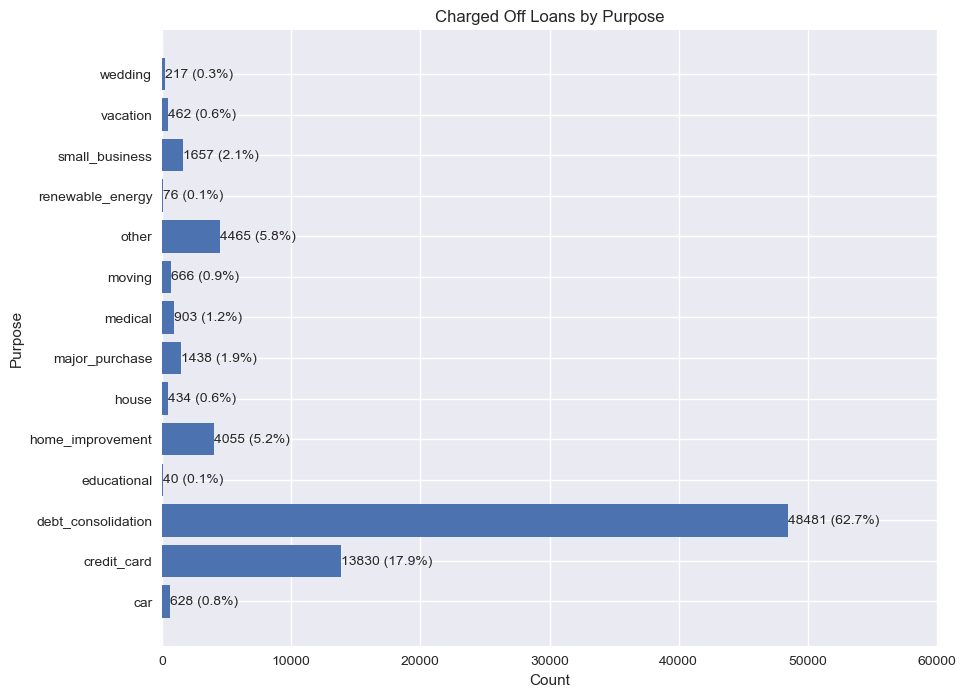

In [714]:
import matplotlib.pyplot as plt

# 데이터 그룹화
grouped_data = data.groupby(['purpose', 'loan_status']).size().unstack()

# 'Charged Off'에 해당하는 데이터 가져오기
charged_off_data = grouped_data['Charged Off']

# 빈도수와 백분율(퍼센트) 계산
total_loans = charged_off_data.sum()
charged_off_counts = charged_off_data.values
charged_off_percent = (charged_off_counts / total_loans) * 100

# 바 차트 그리기
plt.figure(figsize=(10, 8))
bars = plt.barh(charged_off_data.index, charged_off_counts)

# 빈도수와 백분율(퍼센트) 텍스트 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{charged_off_counts[i]} ({charged_off_percent[i]:.1f}%)', 
             va='center', ha='left')

plt.title('Charged Off Loans by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.xlim(0, 60000)
plt.show()

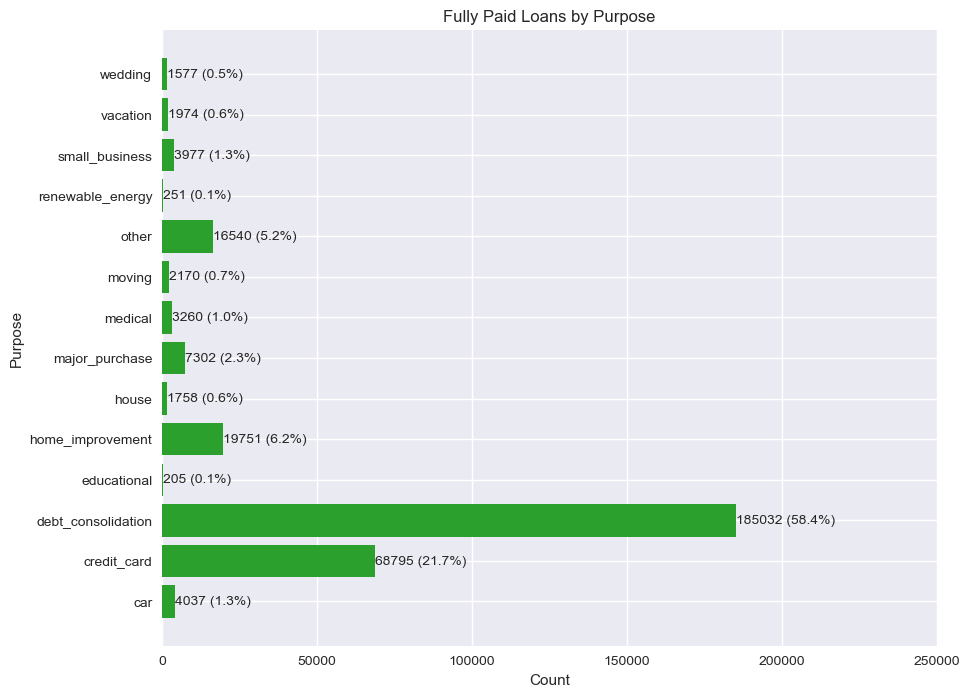

In [715]:
import matplotlib.pyplot as plt

# 데이터 그룹화
grouped_data = data.groupby(['purpose', 'loan_status']).size().unstack()

# 'Charged Off'에 해당하는 데이터 가져오기
fully_paid_data = grouped_data['Fully Paid']

# 빈도수와 백분율(퍼센트) 계산
total_loans = fully_paid_data.sum()
fully_paid_counts = fully_paid_data.values
fully_paid_percent = (fully_paid_counts / total_loans) * 100

# 바 차트 그리기
plt.figure(figsize=(10, 8))
bars = plt.barh(fully_paid_data.index, fully_paid_counts, color='tab:green')

# 빈도수와 백분율(퍼센트) 텍스트 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{fully_paid_counts[i]} ({fully_paid_percent[i]:.1f}%)', 
             va='center', ha='left')

plt.title('Fully Paid Loans by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
# x 축 범위와 간격 설정
plt.xlim(0, 250000)
plt.xticks(range(0, 250001, 50000))  # 0부터 200000까지, 간격은 50000

plt.show()


# 대출 계좌 종류(담보 대출 계좌, 묶여있는 계좌, 활성화된 계좌) 별 체납 여부

In [716]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,total_amnt
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",11861.28
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",9564.48
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",18250.92
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",7943.40
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",36559.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",13042.80
393977,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",25215.12
393978,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",5807.52
393979,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",30181.20


## mort_acc, pub_rec, open_acc 전체

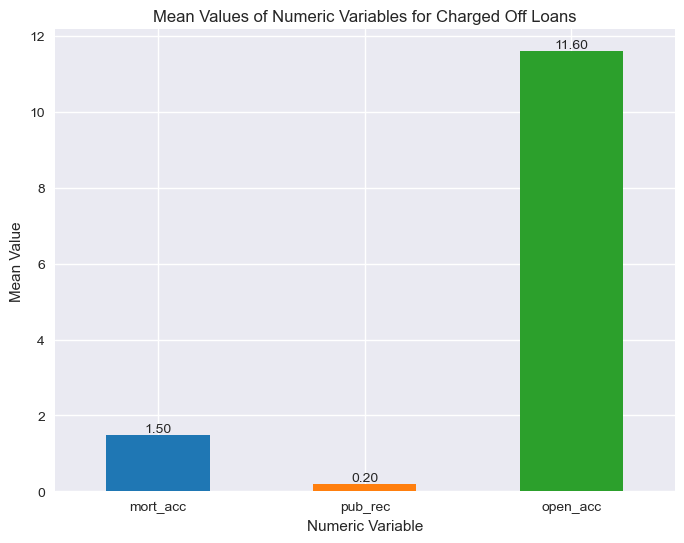

In [717]:
import matplotlib.pyplot as plt

# 'Charged Off'인 데이터 필터링
charged_off_data = data[data['loan_status'] == 'Charged Off']

# 수치형 변수의 평균 계산
mean_values_charged_off = charged_off_data[['mort_acc', 'pub_rec', 'open_acc']].mean()

# 바 차트 그리기
plt.figure(figsize=(8, 6))
mean_plot = mean_values_charged_off.plot(kind='bar', color=['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Mean Values of Numeric Variables for Charged Off Loans')
plt.xlabel('Numeric Variable')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)

# 평균값 표시
for i, mean_value in enumerate(mean_values_charged_off):
    plt.text(i, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')

plt.show()


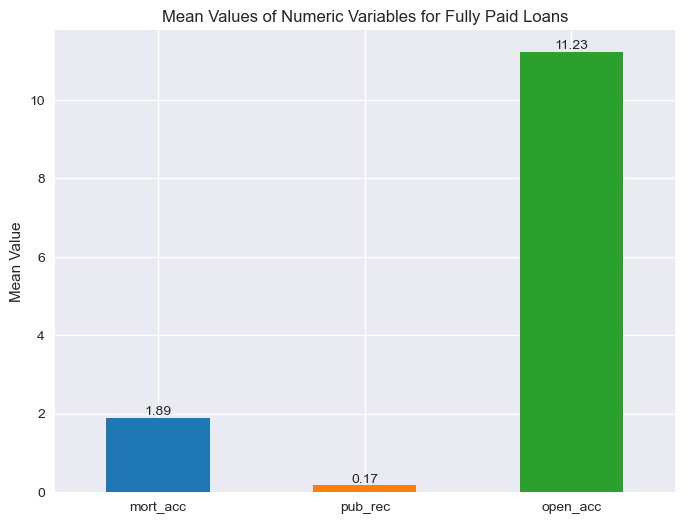

In [718]:
import matplotlib.pyplot as plt

# 'Charged Off'인 데이터 필터링
fully_paid_data = data[data['loan_status'] == 'Fully Paid']

# 수치형 변수의 평균 계산
mean_values_fully_paid = fully_paid_data[['mort_acc', 'pub_rec', 'open_acc']].mean()

# 바 차트 그리기
plt.figure(figsize=(8, 6))
mean_plot = mean_values_fully_paid.plot(kind='bar', color=['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Mean Values of Numeric Variables for Fully Paid Loans')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)

# 평균값 표시
for i, mean_value in enumerate(mean_values_fully_paid):
    plt.text(i, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')

plt.show()

## mort_acc

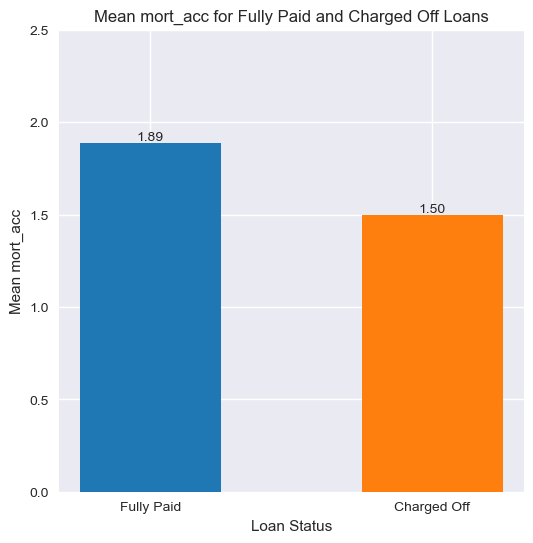

In [719]:
import matplotlib.pyplot as plt

# 'Fully Paid'와 'Charged Off' 데이터 필터링
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
charged_off_data = data[data['loan_status'] == 'Charged Off']

# 'mort_acc'의 평균 계산
mean_mort_acc_fully_paid = fully_paid_data['mort_acc'].mean()
mean_mort_acc_charged_off = charged_off_data['mort_acc'].mean()

# 시각화
plt.figure(figsize=(6, 6))

# 바 차트 그리기
plt.bar(['Fully Paid', 'Charged Off'], [mean_mort_acc_fully_paid, mean_mort_acc_charged_off], color=['tab:blue', 'tab:orange'], width=0.5)

plt.title('Mean mort_acc for Fully Paid and Charged Off Loans')
plt.ylabel('Mean mort_acc')
plt.xlabel('Loan Status')
plt.ylim(0, 2.5)

# 수치 표시
for i, mean_value in enumerate([mean_mort_acc_fully_paid, mean_mort_acc_charged_off]):
    plt.text(i, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')

plt.show()

### 연간 소득과의 관계

#### 연간소득과 loan_status

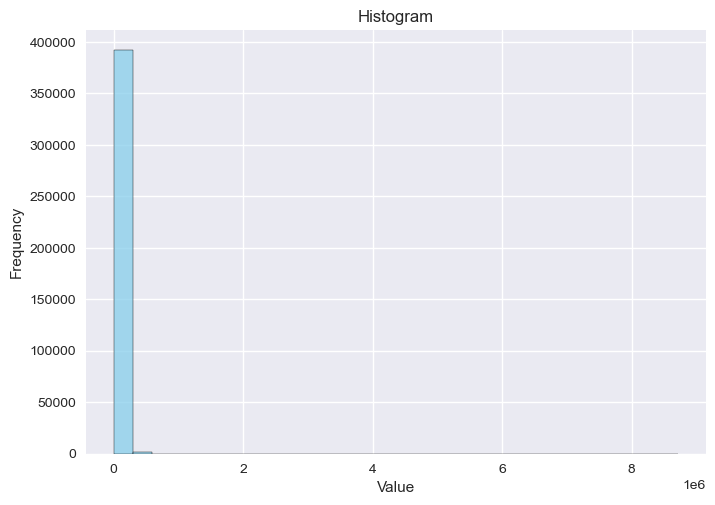

In [720]:
import seaborn as sns

sns.histplot(data['annual_inc'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [721]:
import pandas as pd

# 데이터프레임에 새로운 열 '연간 소득'을 추가합니다.
data['연간 소득'] = pd.qcut(data['annual_inc'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 결과 확인
print(data['연간 소득'])

0         Q4
1         Q3
2         Q1
3         Q2
4         Q2
          ..
393976    Q1
393977    Q4
393978    Q2
393979    Q2
393980    Q1
Name: 연간 소득, Length: 393981, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


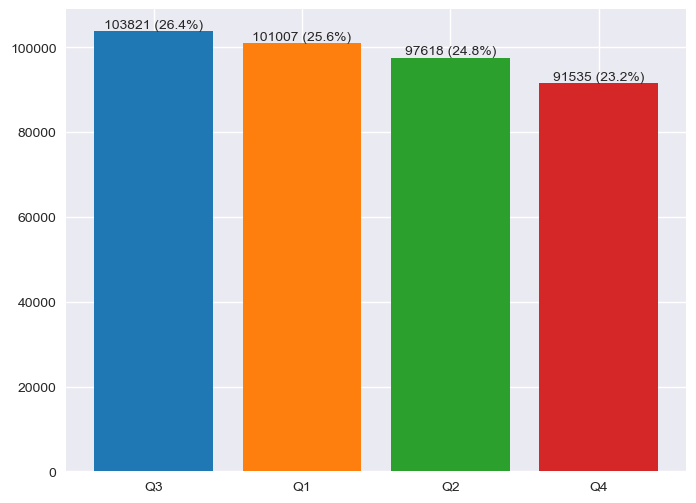

In [722]:
# 구간화 이후 구간별 빈도수 확인
value_counts = data['연간 소득'].value_counts()
total = value_counts.sum()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval} ({yval/total*100:.1f}%)', va='bottom', ha='center')

plt.show()

In [723]:
grouped_annual_inc = data.groupby(['연간 소득', 'loan_status']).size().unstack()
grouped_annual_inc

loan_status,Charged Off,Fully Paid
연간 소득,,
Q1,24328,76679
Q2,20371,77247
Q3,18892,84929
Q4,13761,77774


<Figure size 1000x600 with 0 Axes>

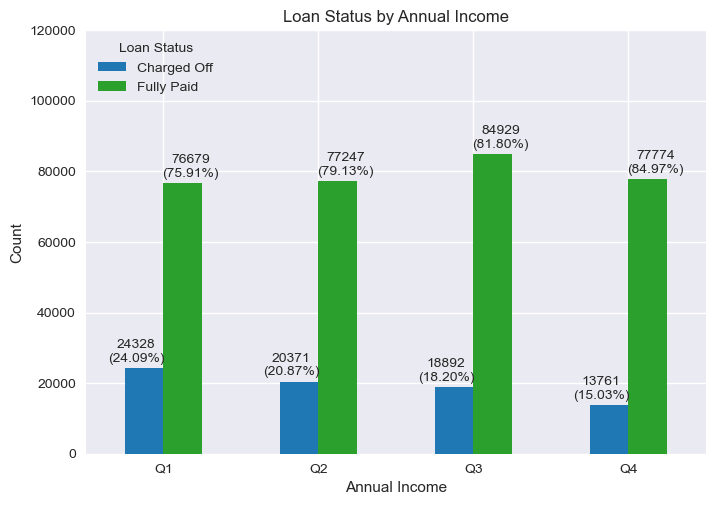

In [724]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
ax = grouped_annual_inc[['Charged Off', 'Fully Paid']].plot(kind='bar', stacked=False, color=['tab:blue', 'tab:green'])

# 범례 위치 조정
plt.legend(title='Loan Status', loc='upper left')

# 막대 위에 빈도수와 퍼센트 표시
bar_width = 0.35  # 막대의 너비
for i, (charged_off, fully_paid) in enumerate(zip(grouped_annual_inc['Charged Off'], grouped_annual_inc['Fully Paid'])):
    ax.text(i - bar_width / 2, charged_off + 1000, f'{charged_off}\n({(charged_off / (charged_off + fully_paid)):.2%})', ha='center', va='bottom')
    ax.text(i + bar_width / 2, fully_paid + 1000, f'{fully_paid}\n({(fully_paid / (charged_off + fully_paid)):.2%})', ha='center', va='bottom')

plt.title('Loan Status by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.ylim(0, 120000)
plt.xticks(rotation=0)
plt.show()


### mort_acc & 연간 소득

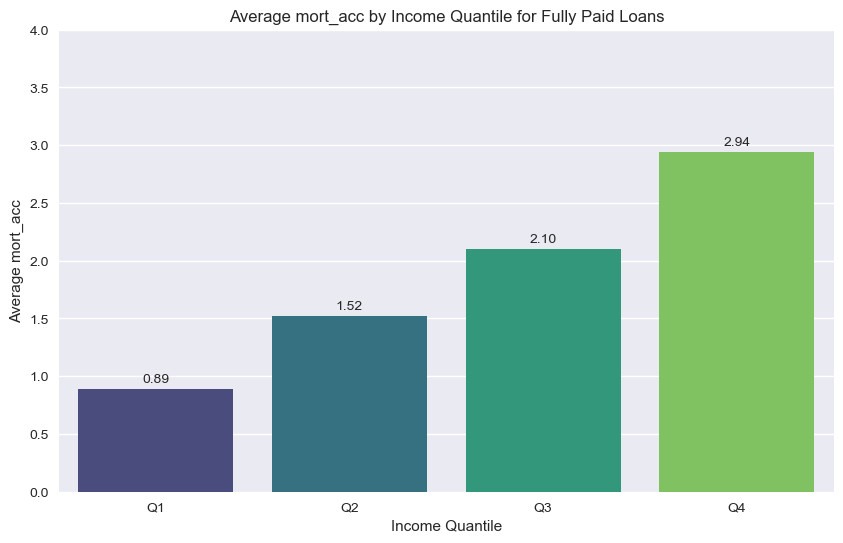

In [725]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 소득 구간별 완납자들의 mort_acc 평균 계산
mean_mort_acc_by_income_quantile = data[data['loan_status'] == 'Fully Paid'].groupby('연간 소득')['mort_acc'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_mort_acc_by_income_quantile.index, y=mean_mort_acc_by_income_quantile.values, palette='viridis')

# 막대 위에 평균값 표시
for i, mean_value in enumerate(mean_mort_acc_by_income_quantile):
    plt.text(i, mean_value + 0.03, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.title('Average mort_acc by Income Quantile for Fully Paid Loans')
plt.xlabel('Income Quantile')
plt.ylabel('Average mort_acc')
plt.xticks(rotation=0)
plt.ylim(0, 4)
plt.show()


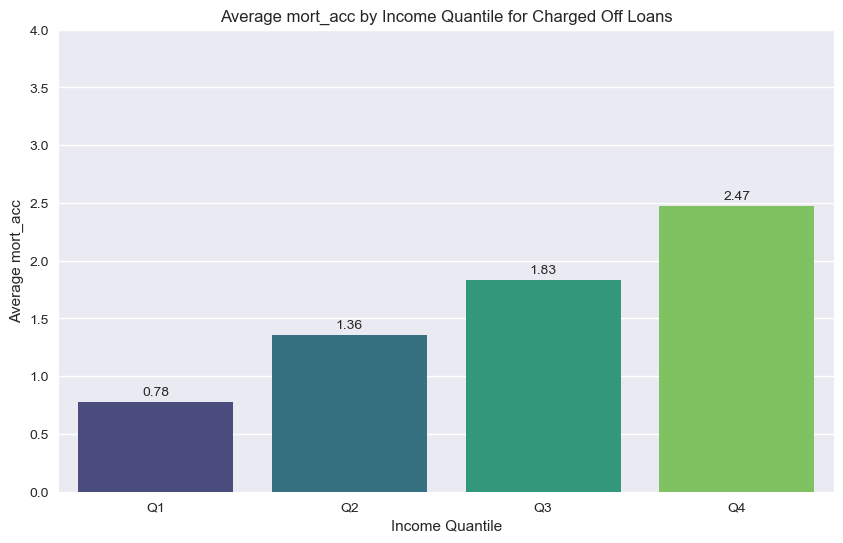

In [726]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 소득 구간별 완납자들의 mort_acc 평균 계산
mean_mort_acc_by_income_quantile = data[data['loan_status'] == 'Charged Off'].groupby('연간 소득')['mort_acc'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_mort_acc_by_income_quantile.index, y=mean_mort_acc_by_income_quantile.values, palette='viridis')

# 막대 위에 평균값 표시
for i, mean_value in enumerate(mean_mort_acc_by_income_quantile):
    plt.text(i, mean_value + 0.03, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.title('Average mort_acc by Income Quantile for Charged Off Loans')
plt.xlabel('Income Quantile')
plt.ylabel('Average mort_acc')
plt.xticks(rotation=0)
plt.ylim(0, 4)
plt.show()

## Open_Acc

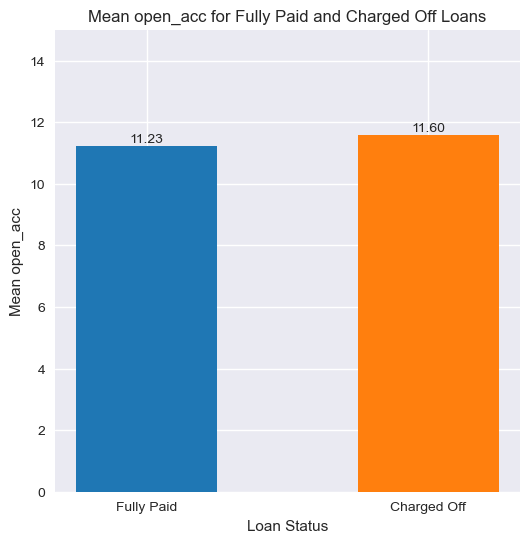

In [727]:
import matplotlib.pyplot as plt

# 'Fully Paid'와 'Charged Off' 데이터 필터링
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
charged_off_data = data[data['loan_status'] == 'Charged Off']

# 'mort_acc'의 평균 계산
mean_open_acc_fully_paid = fully_paid_data['open_acc'].mean()
mean_open_acc_charged_off = charged_off_data['open_acc'].mean()

# 시각화
plt.figure(figsize=(6, 6))

# 바 차트 그리기
plt.bar(['Fully Paid', 'Charged Off'], [mean_open_acc_fully_paid, mean_open_acc_charged_off], color=['tab:blue', 'tab:orange'], width=0.5)

plt.title('Mean open_acc for Fully Paid and Charged Off Loans')
plt.ylabel('Mean open_acc')
plt.xlabel('Loan Status')
plt.ylim(0, 15)

# 수치 표시
for i, mean_value in enumerate([mean_open_acc_fully_paid, mean_open_acc_charged_off]):
    plt.text(i, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')

plt.show()

### open_acc & 연간 소득

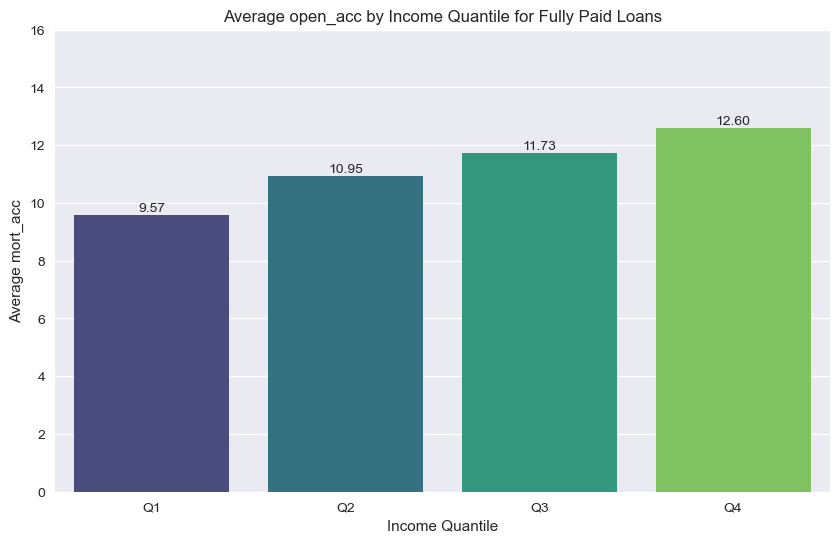

In [728]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 소득 구간별 완납자들의 open_acc 평균 계산
mean_mort_acc_by_income_quantile = data[data['loan_status'] == 'Fully Paid'].groupby('연간 소득')['open_acc'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_mort_acc_by_income_quantile.index, y=mean_mort_acc_by_income_quantile.values, palette='viridis')

# 막대 위에 평균값 표시
for i, mean_value in enumerate(mean_mort_acc_by_income_quantile):
    plt.text(i, mean_value + 0.03, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.title('Average open_acc by Income Quantile for Fully Paid Loans')
plt.xlabel('Income Quantile')
plt.ylabel('Average mort_acc')
plt.xticks(rotation=0)
plt.ylim(0, 16)
plt.show()


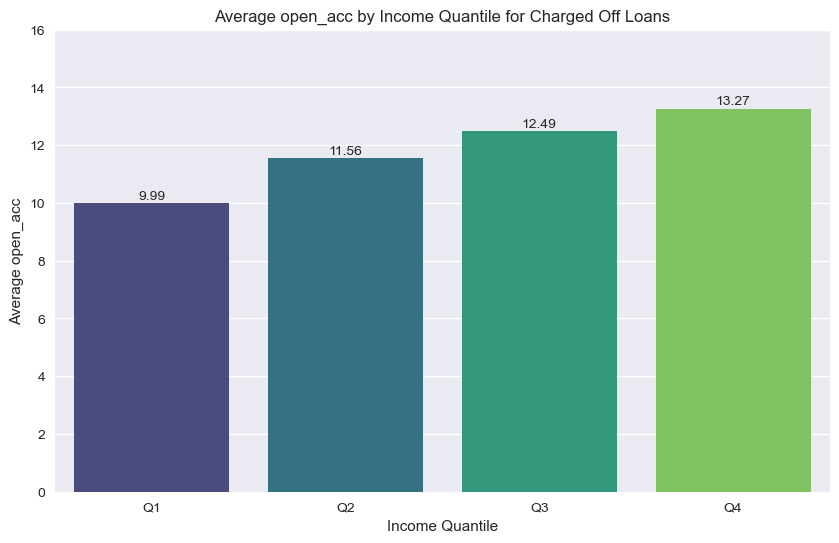

In [729]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 소득 구간별 체납자들의 open_acc 평균 계산
mean_open_acc_by_income_quantile = data[data['loan_status'] == 'Charged Off'].groupby('연간 소득')['open_acc'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_open_acc_by_income_quantile.index, y=mean_open_acc_by_income_quantile.values, palette='viridis')

# 막대 위에 평균값 표시
for i, mean_value in enumerate(mean_open_acc_by_income_quantile):
    plt.text(i, mean_value + 0.03, f'{mean_value:.2f}', ha='center', va='bottom', fontsize=10)
    
plt.title('Average open_acc by Income Quantile for Charged Off Loans')
plt.xlabel('Income Quantile')
plt.ylabel('Average open_acc')
plt.xticks(rotation=0)
plt.ylim(0, 16)
plt.show()


## pub_rec

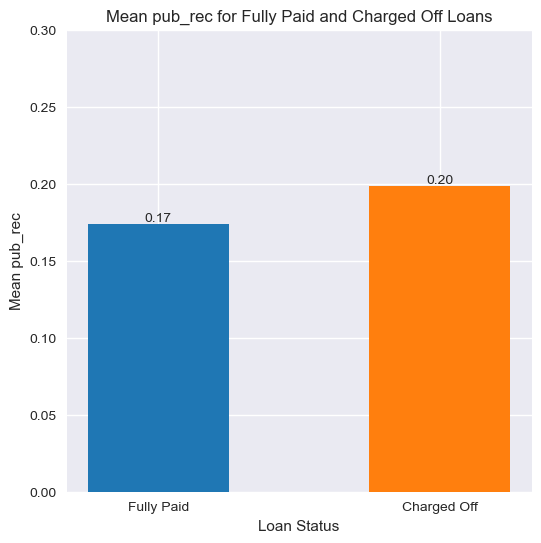

In [730]:
import matplotlib.pyplot as plt

# 'Fully Paid'와 'Charged Off' 데이터 필터링
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
charged_off_data = data[data['loan_status'] == 'Charged Off']

# 'mort_acc'의 평균 계산
mean_pub_rec_fully_paid = fully_paid_data['pub_rec'].mean()
mean_pub_rec_charged_off = charged_off_data['pub_rec'].mean()

# 시각화
plt.figure(figsize=(6, 6))

# 바 차트 그리기
plt.bar(['Fully Paid', 'Charged Off'], [mean_pub_rec_fully_paid, mean_pub_rec_charged_off], color=['tab:blue', 'tab:orange'], width=0.5)

plt.title('Mean pub_rec for Fully Paid and Charged Off Loans')
plt.ylabel('Mean pub_rec')
plt.xlabel('Loan Status')
plt.ylim(0, 0.3)

# 수치 표시
for i, mean_value in enumerate([mean_pub_rec_fully_paid, mean_pub_rec_charged_off]):
    plt.text(i, mean_value, f'{mean_value:.2f}', ha='center', va='bottom')

plt.show()

# 연간 소득 구간별 체납율 

In [731]:
data.groupby(['연간 소득', 'loan_status']).size()

연간 소득  loan_status
Q1     Charged Off    24328
       Fully Paid     76679
Q2     Charged Off    20371
       Fully Paid     77247
Q3     Charged Off    18892
       Fully Paid     84929
Q4     Charged Off    13761
       Fully Paid     77774
dtype: int64

In [732]:
charged_off_grouped = data[data['loan_status'] == 'Charged Off'].groupby('연간 소득').size().reset_index(name='count')
charged_off_grouped['count'].sum()

77352

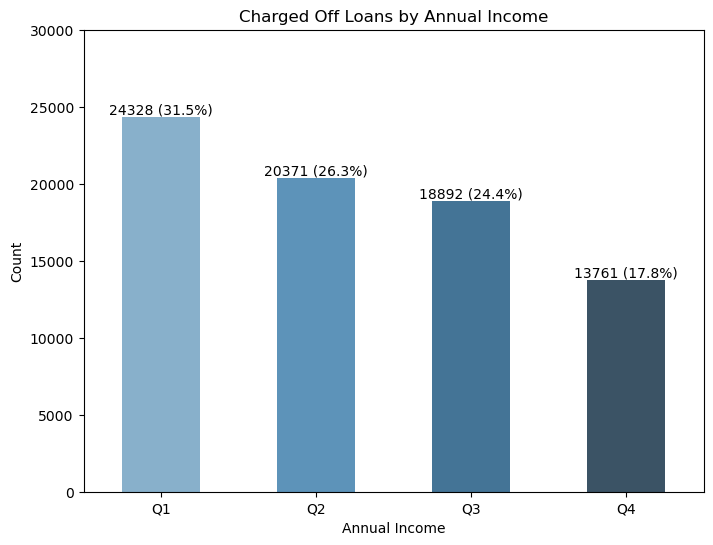

In [733]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')

# 'loan_status'가 'Charged Off'인 경우만 필터링하여 그룹화하고 크기를 계산
charged_off_grouped = data[data['loan_status'] == 'Charged Off'].groupby('연간 소득').size().reset_index(name='count')

# Charged Off 대출 총합 구하기
total_charged_off = charged_off_grouped['count'].sum()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=charged_off_grouped, x='연간 소득', y='count', palette="Blues_d", width=0.5)

# 빈도수와 비율 표시
for index, row in charged_off_grouped.iterrows():
    percentage = row['count'] / total_charged_off * 100
    plt.text(index, row['count'], f'{row["count"]} ({percentage:.1f}%)',
             color='black', ha="center", va="bottom")

plt.title('Charged Off Loans by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.ylim(0, 30000)
plt.show()


# 전체 체납자 중 등급별 비율

In [734]:
charged_off_grouped = data[data['loan_status'] == 'Charged Off'].groupby('grade').size().reset_index(name='count')
charged_off_grouped.sum()

grade    ABCDEFG
count      77352
dtype: object

In [735]:
charged_off_grouped1 = data[data['loan_status'] == 'Charged Off'].groupby('grade').size().reset_index(name='count')
charged_off_grouped1

,grade,count
0,A,4019
1,B,14531
2,C,22366
3,D,18253
4,E,11712
5,F,5015
6,G,1456


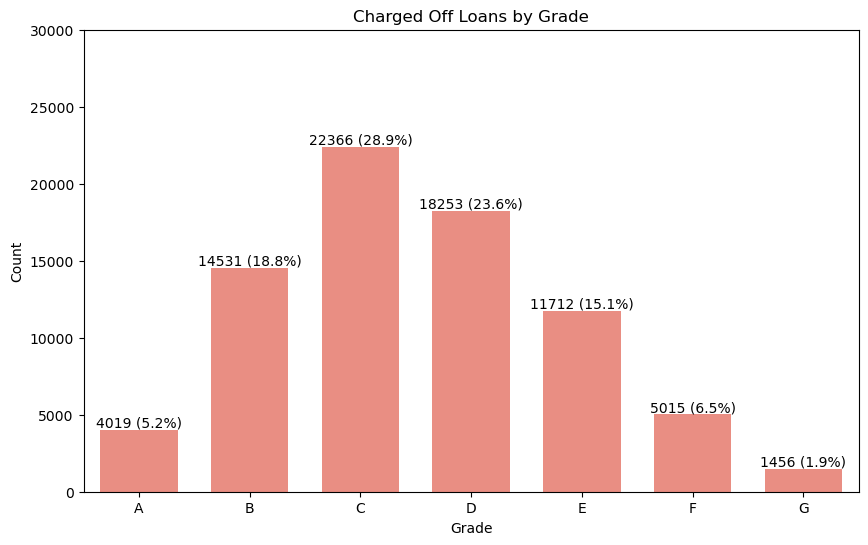

In [736]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'loan_status'가 'Charged Off'인 경우만 필터링하여 그룹화하고 크기를 계산
charged_off_grouped1 = data[data['loan_status'] == 'Charged Off'].groupby('grade').size().reset_index(name='count')

# Charged Off 대출 총합 구하기
total_charged_off = charged_off_grouped1['count'].sum()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=charged_off_grouped1, x='grade', y='count', color='salmon', width=0.7)

# 빈도수와 비율 표시
for index, row in charged_off_grouped1.iterrows():
    percentage = row['count'] / total_charged_off * 100
    plt.text(index, row['count'], f'{row["count"]} ({percentage:.1f}%)',
             color='black', ha="center", va="bottom")

plt.title('Charged Off Loans by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.ylim(0, 30000)
plt.show()

# 등급별 체납/완납자 비율

In [737]:
grouped = data.groupby(['grade', 'loan_status']).size().reset_index(name='count')
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# 그레이드를 숫자로 매핑하여 새로운 열 생성
grouped['grade_num'] = grouped['grade'].map(grade_mapping)

totals = []
for i in range(7):
    total = grouped.loc[grouped['grade_num'] == i, 'count'].sum()
    totals.append(total)
# totals 리스트가 10개의 원소를 가지도록 확장
totals = totals * 2
totals

[63772,
 115489,
 105457,
 63188,
 31330,
 11708,
 3037,
 63772,
 115489,
 105457,
 63188,
 31330,
 11708,
 3037]

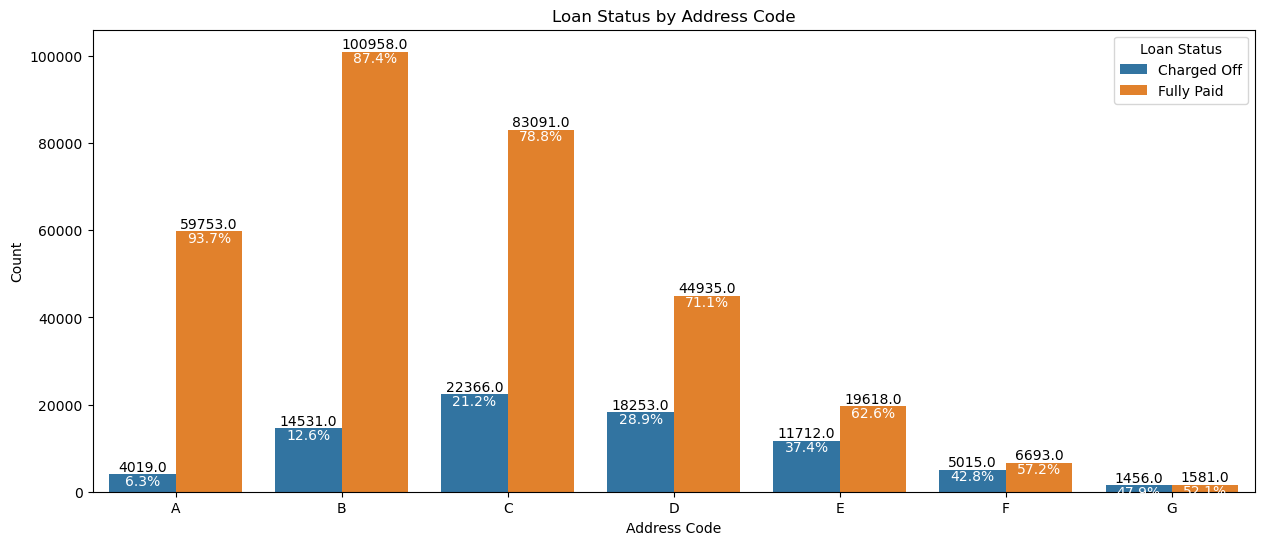

In [738]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 그룹과 대출 상태로 그룹화하고 크기 계산
grouped = data.groupby(['grade', 'loan_status']).size().reset_index(name='count')
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# 그레이드를 숫자로 매핑하여 새로운 열 생성
grouped['grade_num'] = grouped['grade'].map(grade_mapping)

totals = []
for i in range(7):
    total = grouped.loc[grouped['grade_num'] == i, 'count'].sum()
    totals.append(total)
# totals 리스트가 10개의 원소를 가지도록 확장
totals = totals * 2

# 시각화
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=grouped, x='grade', y='count', hue='loan_status')

# 막대 위에 빈도수와 퍼센트 표시
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

    # 해당 막대의 비율(백분율) 계산
    total = totals[i]
    percentage = height / total * 100

    # 비율(백분율) 표시
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='top', color='white')

plt.title('Loan Status by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

# 등급별 1인당 평균 소득 
- C, D 등급은 타 등급에 비해 체납자가 많았는데, 1인당 평균 소득도 낮았음
- 등급이 높은 축에 속하는 B 등급도 체납자가 많은 편, 왤까? 봤더니 1인당 평균 소득이 뒤에서 3등. 낮은편 

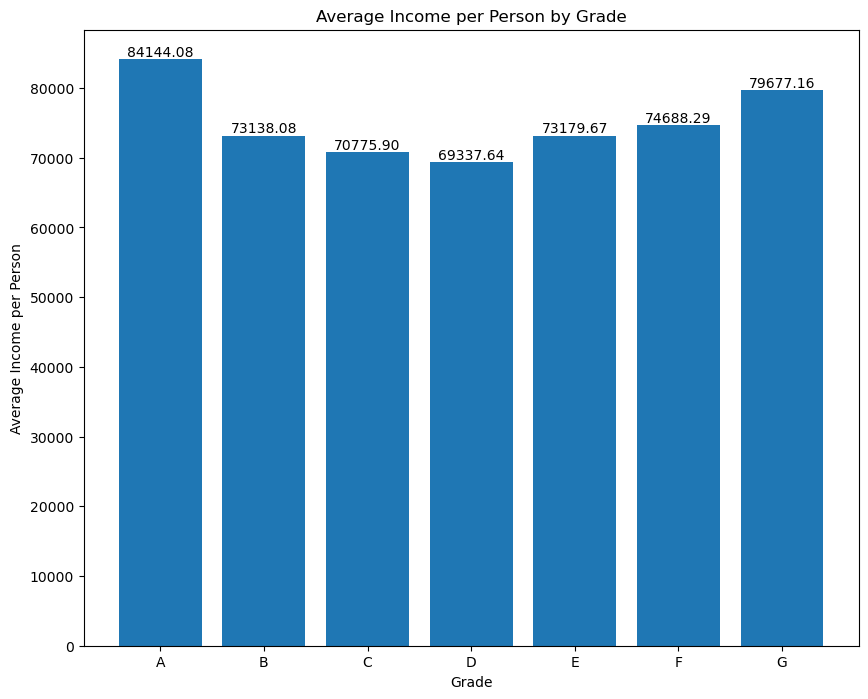

In [739]:
import matplotlib.pyplot as plt

grade_grouped = data.groupby('grade')['annual_inc'].agg(['sum', 'size']).reset_index()
grade_grouped['average_inc_per_person'] = grade_grouped['sum'] / grade_grouped['size'] 

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(grade_grouped['grade'], grade_grouped['average_inc_per_person'], color='tab:blue')
plt.title('Average Income per Person by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Income per Person')
plt.xticks(rotation=0)
# plt.ylim(0, 90000)

# 각 막대 위에 1인당 평균 소득 표시
for bar, height in zip(bars, grade_grouped['average_inc_per_person']):
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


# 등급별 1인당 파산 평균 횟수
- 등급이 높을수록 1인당 평균 파산 횟수가 많은 편
- C 등급이 가장 많고 그 다음이 D 등급
- 대출 등급에는 연간 소득 + 파산 횟수가 영향을 미쳤을 것 같음(평균 소득이 높은데 왜 G등급일까 싶었는데, 파산 횟수가 A, B 등급에 비해 많음)

In [740]:
bankrup_grouped = data.groupby('grade')['pub_rec_bankruptcies'].agg(['sum', 'size']).reset_index()
bankrup_grouped

,grade,sum,size
0,A,3288.0,63772
1,B,14311.0,115489
2,C,15285.0,105457
3,D,8936.0,63188
4,E,4261.0,31330
5,F,1594.0,11708
6,G,419.0,3037


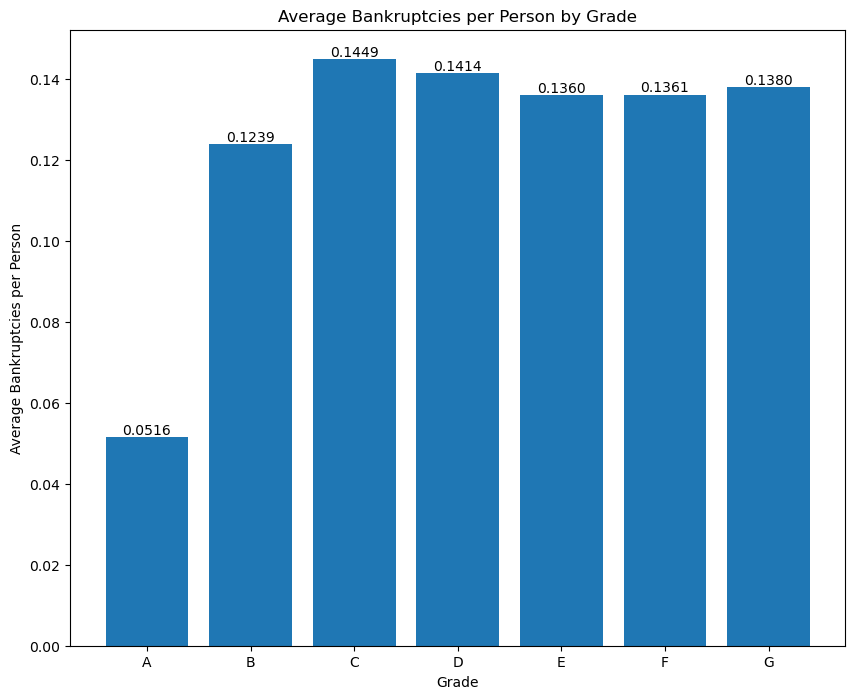

In [741]:
import matplotlib.pyplot as plt

bankrup_grouped = data.groupby('grade')['pub_rec_bankruptcies'].agg(['sum', 'size']).reset_index()
bankrup_grouped['average_bankrup_per_person'] = bankrup_grouped['sum'] / bankrup_grouped['size'] 

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(bankrup_grouped['grade'], bankrup_grouped['average_bankrup_per_person'], color='tab:blue')
plt.title('Average Bankruptcies per Person by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Bankruptcies per Person')
plt.xticks(rotation=0)
# plt.ylim(0, 90000)

# 각 막대 위에 1인당 평균 소득 표시
for bar, height in zip(bars, bankrup_grouped['average_bankrup_per_person']):
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()


# 고객 유형 별 파산횟수 평균

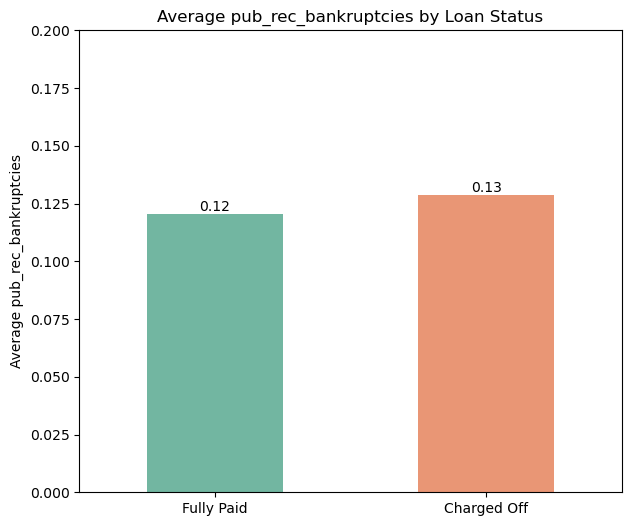

In [742]:
import seaborn as sns
import matplotlib.pyplot as plt

# 완납자와 체납자 데이터 필터링
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
charged_off_data = data[data['loan_status'] == 'Charged Off']

# 완납자와 체납자별 pub_rec_bankruptcies 평균 계산
mean_pub_rec_bankruptcies_fully_paid = fully_paid_data['pub_rec_bankruptcies'].mean()
mean_pub_rec_bankruptcies_charged_off = charged_off_data['pub_rec_bankruptcies'].mean()

# 시각화
plt.figure(figsize=(7, 6))
sns.barplot(x=['Fully Paid', 'Charged Off'], y=[mean_pub_rec_bankruptcies_fully_paid, mean_pub_rec_bankruptcies_charged_off], palette='Set2', width=0.5)

# 평균값 표시
plt.text(0, mean_pub_rec_bankruptcies_fully_paid, f'{mean_pub_rec_bankruptcies_fully_paid:.2f}', ha='center', va='bottom')
plt.text(1, mean_pub_rec_bankruptcies_charged_off, f'{mean_pub_rec_bankruptcies_charged_off:.2f}', ha='center', va='bottom')
plt.ylim(0, 0.2)
plt.title('Average pub_rec_bankruptcies by Loan Status')
plt.ylabel('Average pub_rec_bankruptcies')
plt.show()


# 대출 종류 별 체납 여부

In [743]:
data['initial_list_status']

0         w
1         f
2         f
3         f
4         f
         ..
393976    w
393977    f
393978    f
393979    f
393980    f
Name: initial_list_status, Length: 393981, dtype: object

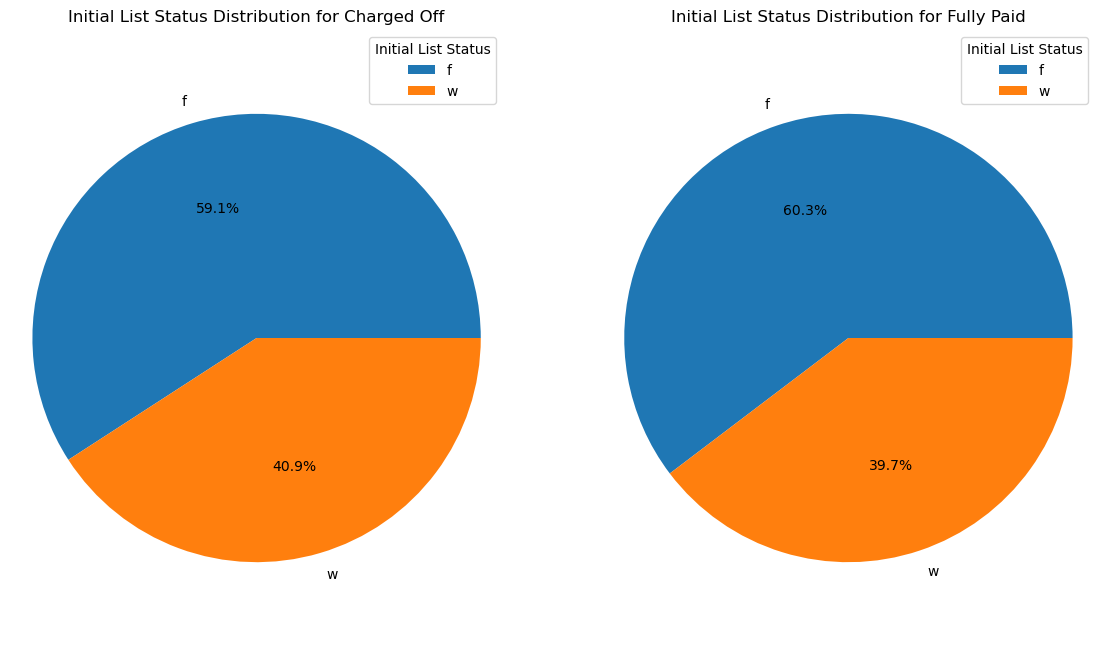

In [744]:
import matplotlib.pyplot as plt

# 'loan_status'별로 'initial_list_status' 카운트
status_counts = data.groupby('loan_status')['initial_list_status'].value_counts().unstack()

# subplot 생성
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# 각 subplot에 파이 차트 추가
for i, (index, row) in enumerate(status_counts.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%')
    axs[i].set_title(f'Initial List Status Distribution for {index}')
    axs[i].axis('equal')
    axs[i].legend(title='Initial List Status', loc='upper right')  # 라벨 추가

plt.show()

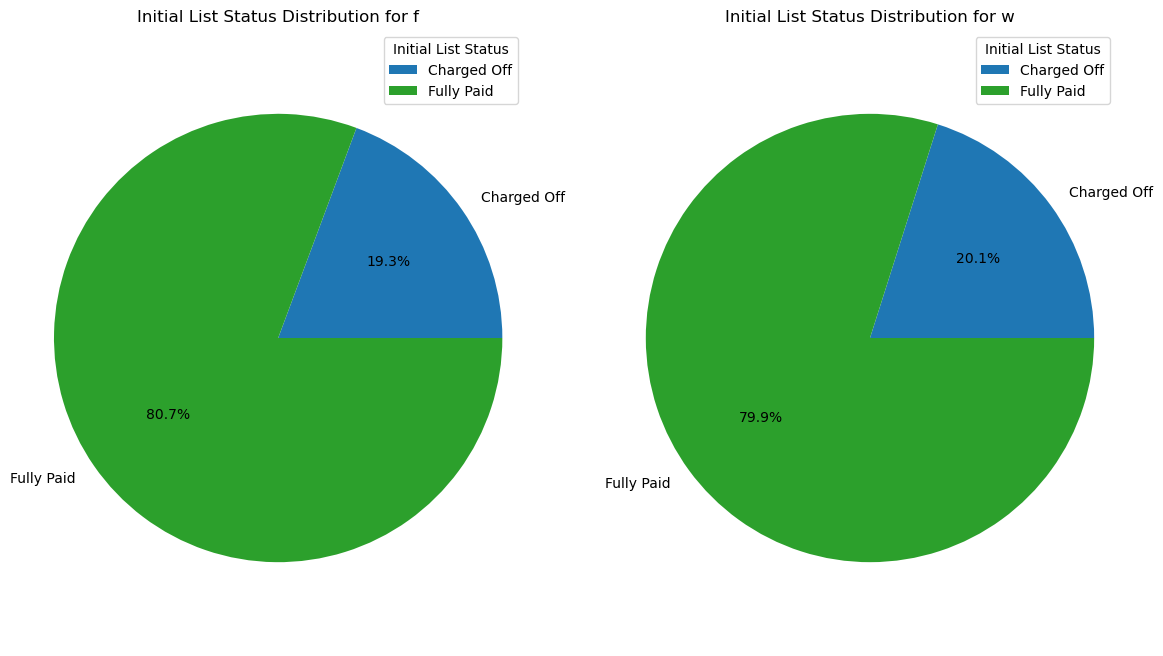

In [745]:
import matplotlib.pyplot as plt

# 'loan_status'별로 'initial_list_status' 카운트
status_counts = data.groupby('initial_list_status')['loan_status'].value_counts().unstack()

# subplot 생성
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# 각 subplot에 파이 차트 추가
for i, (index, row) in enumerate(status_counts.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%', colors=['tab:blue', 'tab:green'])
    axs[i].set_title(f'Initial List Status Distribution for {index}')
    axs[i].axis('equal')
    axs[i].legend(title='Initial List Status', loc='upper right')  # 라벨 추가

plt.show()

## 조각 대출 & 총 대출 금액 & 체납 여부

In [746]:
data[data['initial_list_status']=='f']['total_amnt'].sum()

4176449682.9599996

In [747]:
data.groupby(['initial_list_status', 'loan_status'])['total_amnt'].sum()

initial_list_status  loan_status
f                    Charged Off    9.324289e+08
                     Fully Paid     3.244021e+09
w                    Charged Off    6.948694e+08
                     Fully Paid     2.368152e+09
Name: total_amnt, dtype: float64

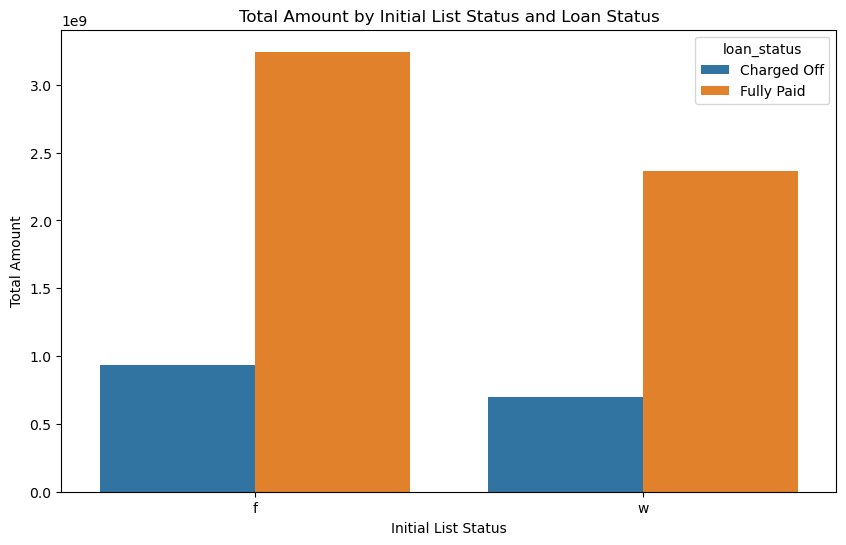

In [748]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 그룹화하고 'total_amnt'의 합계를 계산합니다.
grouped_data = data.groupby(['initial_list_status', 'loan_status'])['total_amnt'].sum().reset_index()

# Seaborn을 사용하여 그래프를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='initial_list_status', y='total_amnt', hue='loan_status', data=grouped_data)
plt.title('Total Amount by Initial List Status and Loan Status')
plt.xlabel('Initial List Status')
plt.ylabel('Total Amount')
plt.show()

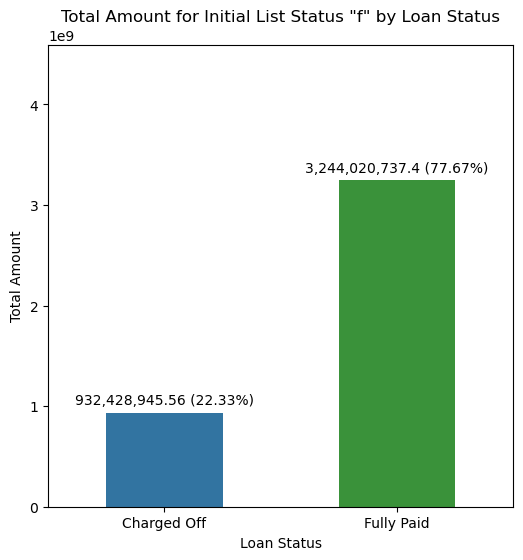

In [749]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 그룹화하고 'total_amnt'의 합계를 계산합니다.
grouped_data = data.groupby(['initial_list_status', 'loan_status'])['total_amnt'].sum().reset_index()

# 'f'에 해당하는 데이터만 추출합니다.
f_data = grouped_data[grouped_data['initial_list_status'] == 'f']

# 전체 합계를 계산합니다.
total_sum = f_data['total_amnt'].sum()

# Seaborn을 사용하여 그래프를 그립니다.
plt.figure(figsize=(6, 6))

ax = sns.barplot(x='loan_status', y='total_amnt', data=f_data, palette=['tab:blue', 'tab:green'], width=0.5)
plt.title('Total Amount for Initial List Status "f" by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Amount')

# y 축 범위를 늘립니다.
plt.ylim(0, 1.1 * total_sum)

# 각 막대에 합계 값을 표시합니다.
for index, row in f_data.iterrows():
    plt.text(index, row['total_amnt'] + 0.02 * total_sum, f"{row['total_amnt']:,} ({row['total_amnt']/total_sum:.2%})", color='black', ha="center")

plt.show()

## 조각 대출 & 잔여 대출 금액 & 체납 여부

In [750]:
data.groupby(['initial_list_status', 'loan_status'])['loan_amnt'].sum()

initial_list_status  loan_status
f                    Charged Off    6.713740e+08
                     Fully Paid     2.542105e+09
w                    Charged Off    4.976401e+08
                     Fully Paid     1.841213e+09
Name: loan_amnt, dtype: float64

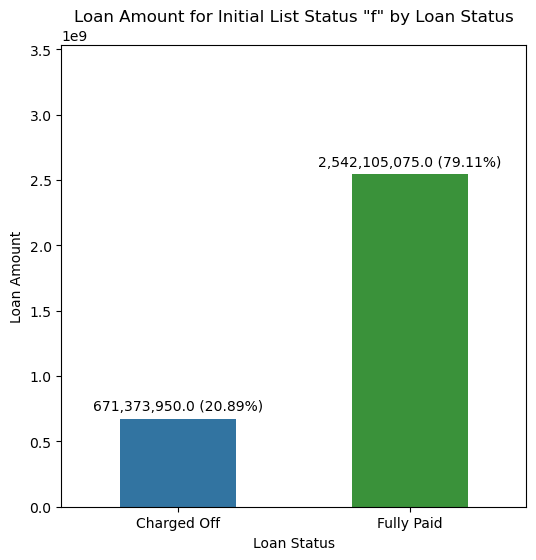

In [751]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 그룹화하고 'total_amnt'의 합계를 계산합니다.
grouped_data = data.groupby(['initial_list_status', 'loan_status'])['loan_amnt'].sum().reset_index()

# 'f'에 해당하는 데이터만 추출합니다.
f_data = grouped_data[grouped_data['initial_list_status'] == 'f']

# 전체 합계를 계산합니다.
total_sum = f_data['loan_amnt'].sum()

# Seaborn을 사용하여 그래프를 그립니다.
plt.figure(figsize=(6, 6))

ax = sns.barplot(x='loan_status', y='loan_amnt', data=f_data, palette=['tab:blue', 'tab:green'], width=0.5)
plt.title('Loan Amount for Initial List Status "f" by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

# y 축 범위를 늘립니다.
plt.ylim(0, 1.1 * total_sum)

# 각 막대에 합계 값을 표시합니다.
for index, row in f_data.iterrows():
    plt.text(index, row['loan_amnt'] + 0.02 * total_sum, f"{row['loan_amnt']:,} ({row['loan_amnt']/total_sum:.2%})", color='black', ha="center")

plt.show()

# 지역별 분석

In [752]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,total_amnt,연간 소득
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",11861.28,Q4
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",9564.48,Q3
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",18250.92,Q1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",7943.40,Q2
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",36559.80,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",13042.80,Q1
393977,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",25215.12,Q4
393978,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",5807.52,Q2
393979,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",30181.20,Q2


In [753]:
import re

# 우편번호 추출 함수 정의
def extract_zipcode(address):
    zipcode = re.search(r'\b\d{5}\b', address).group()
    return zipcode

# 데이터프레임에 적용하여 우편번호 추출
data['Zipcode'] = data['address'].apply(extract_zipcode)

print(data['Zipcode'])

0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
393976    12951
393977    05113
393978    70466
393979    29597
393980    48052
Name: Zipcode, Length: 393981, dtype: object


In [754]:
# 주소 코드와 대출 상태로 그룹화하고 크기 계산
data['address_code'] = data['Zipcode'].str[0]
grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')

In [755]:
grouped

,address_code,loan_status,count
0,0,Charged Off,2334
1,0,Fully Paid,73139
2,1,Charged Off,10051
3,1,Fully Paid,9403
4,2,Charged Off,10024
5,2,Fully Paid,73188
6,3,Charged Off,9958
7,3,Fully Paid,41201
8,4,Charged Off,10178
9,4,Fully Paid,40441


## 지역별 전체 소득 비교

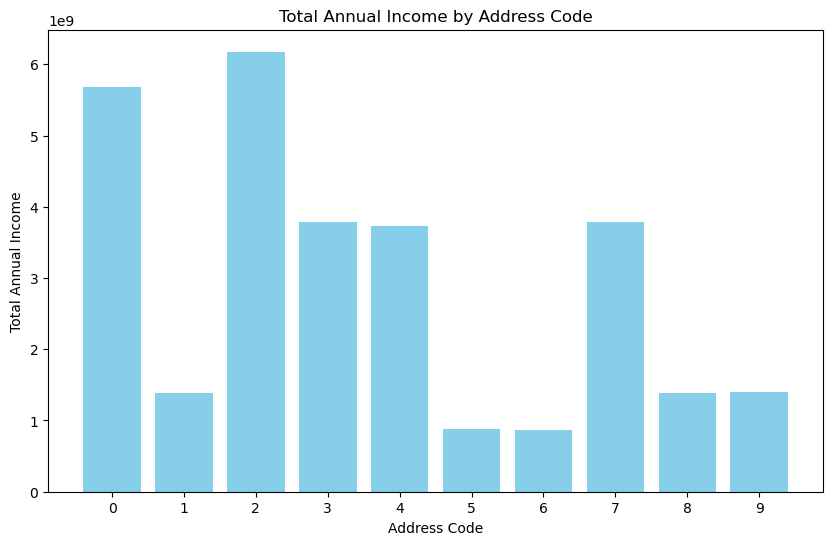

In [756]:
# 주소 코드와 대출 상태로 그룹화하고 크기 계산
grouped2 = data.groupby('address_code')['annual_inc'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped2['address_code'], grouped2['annual_inc'], color='skyblue')
plt.title('Total Annual Income by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Total Annual Income')
plt.xticks(rotation=0)
plt.show()

## 지역별 1인당 평균 소득 비교

In [757]:
grouped = data.groupby('address_code')['annual_inc'].agg(['sum', 'size']).reset_index()
grouped

,address_code,sum,size
0,0,5.674978e+09,75473
1,1,1.391689e+09,19454
2,2,6.176680e+09,83212
3,3,3.784432e+09,51159
4,4,3.730803e+09,50619
5,5,8.748154e+08,11807
6,6,8.671616e+08,11800
7,7,3.782776e+09,51506
8,8,1.384709e+09,19400
9,9,1.398905e+09,19551


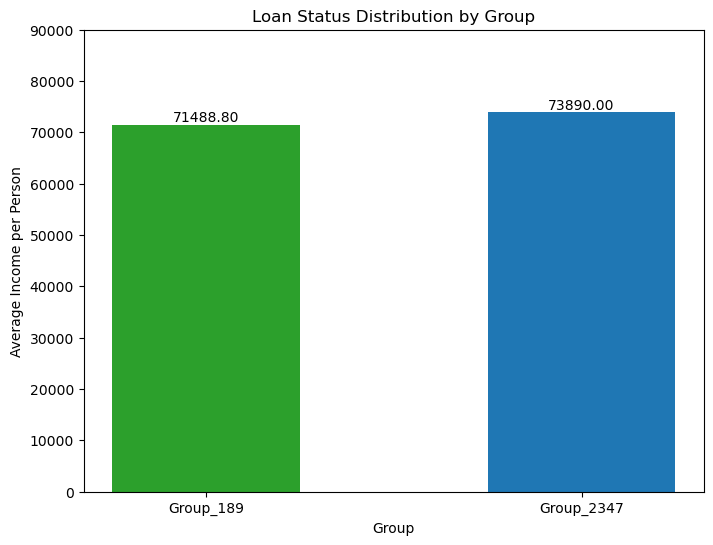

In [758]:
# 1, 8, 9 지역과 2, 3, 4, 7 지역을 묶기
grouped = data.groupby('address_code')['annual_inc'].agg(['sum', 'size']).reset_index()
grouped_189 = grouped[(grouped['address_code'] == '1') | (grouped['address_code'] == '8') | (grouped['address_code'] == '9')]
grouped_2347 = grouped[(grouped['address_code'] == '2') | (grouped['address_code'] == '3') | (grouped['address_code'] == '4') | (grouped['address_code'] == '7')]
grouped_189_list = [grouped_189['sum'].sum(), grouped_189['size'].sum()]
grouped_2347_list = [grouped_2347['sum'].sum(), grouped_2347['size'].sum()]

# 데이터프레임 생성
df = pd.DataFrame({'sum': [grouped_189_list[0], grouped_2347_list[0]], 'size': [grouped_189_list[1], grouped_2347_list[1]]}, index=['Group_189', 'Group_2347'])

plt.figure(figsize=(8, 6))

colors = ['tab:green', 'tab:blue']
bars = plt.bar(df.index, df['sum'] / df['size'], width=0.5, color=colors)
plt.title('Loan Status Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Average Income per Person')
plt.xticks(rotation=0)
plt.ylim(0, 90000)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


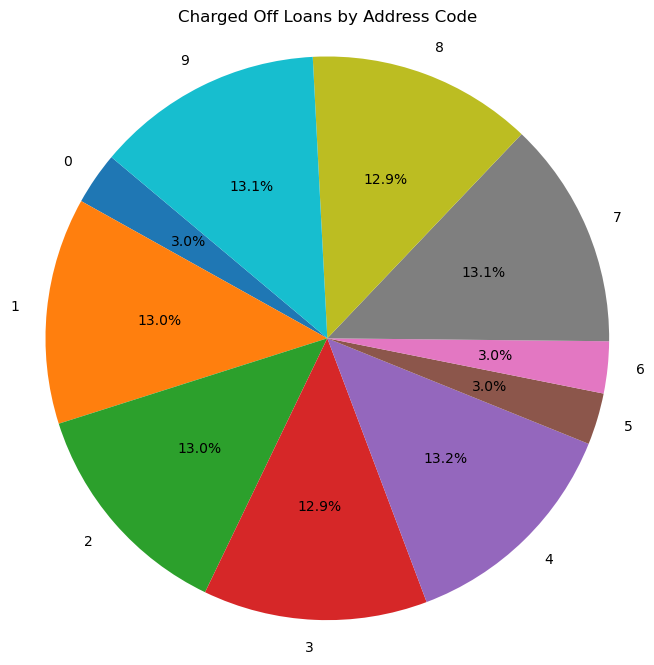

In [759]:
import matplotlib.pyplot as plt

# 체납자(Charged Off)들만 필터링
grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')
charged_off_data = grouped[grouped['loan_status'] == 'Charged Off']

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(charged_off_data['count'], labels=charged_off_data['address_code'], autopct='%1.1f%%', startangle=140)
plt.title('Charged Off Loans by Address Code')
plt.axis('equal')  # 원형으로 조정
plt.show()

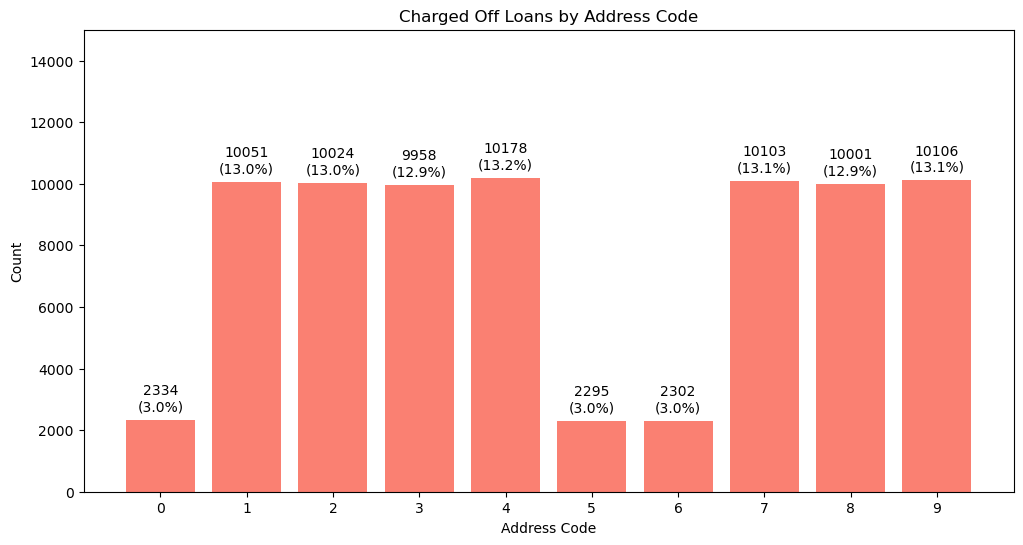

In [760]:
import matplotlib.pyplot as plt

grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')
charged_off_data = grouped[grouped['loan_status'] == 'Charged Off']

# Charged Off 대출의 총 건수 구하기
total_loans = charged_off_data['count'].sum()

# 바 차트로 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(charged_off_data['address_code'], charged_off_data['count'], color='salmon')
plt.title('Charged Off Loans by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.ylim(0, 15000)

# 막대 위에 빈도수와 퍼센트 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = charged_off_data.iloc[i]['count'] / total_loans * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

## 지역과 등급

In [761]:
grouped = data.groupby(['address_code', 'grade']).size().reset_index(name='count')
grouped

,address_code,grade,count
0,0,A,13862
1,0,B,23834
2,0,C,20056
3,0,D,10903
4,0,E,4754
...,...,...,...
65,9,C,5428
66,9,D,3625
67,9,E,2115
68,9,F,841


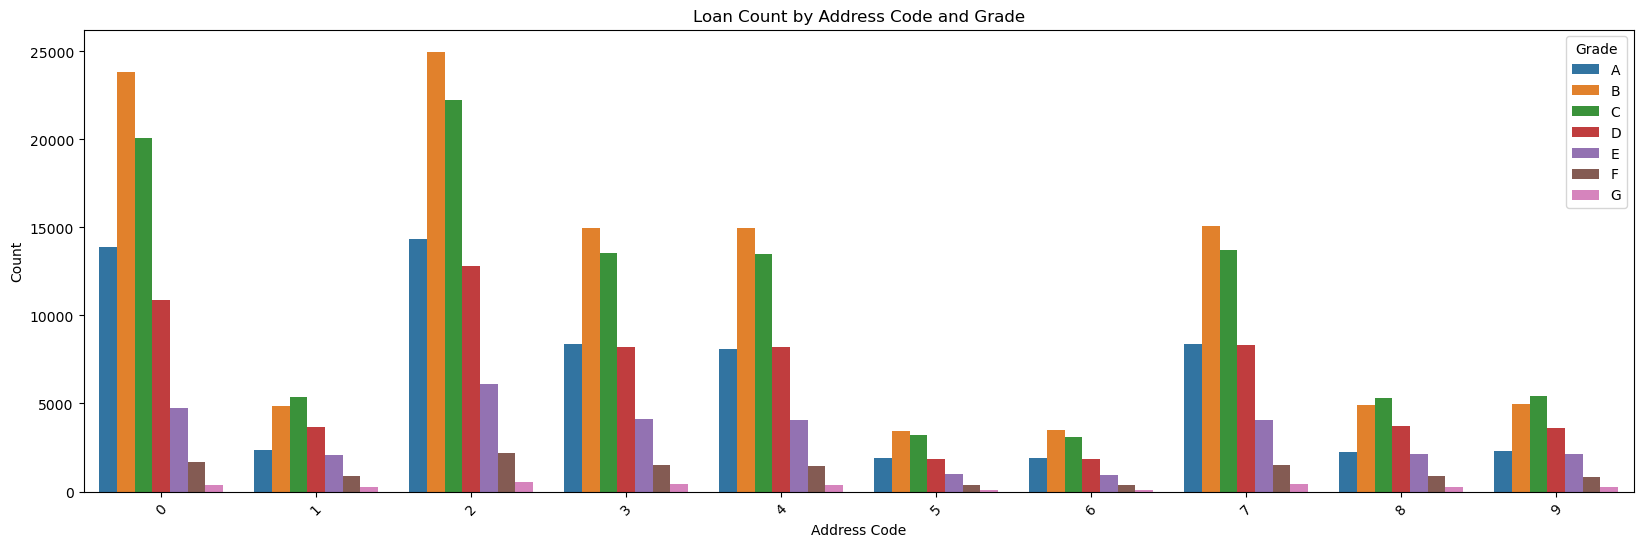

In [762]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
grouped = data.groupby(['address_code', 'grade']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='grade')

plt.title('Loan Count by Address Code and Grade')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Grade', loc='upper right')
plt.show()

### 체납자만 확인

In [763]:
filtered_data = data[data['loan_status'] == 'Charged Off']
grouped = filtered_data.groupby(['address_code', 'grade']).size().reset_index(name='count')
grouped

,address_code,grade,count
0,0,A,128
1,0,B,465
2,0,C,698
3,0,D,512
4,0,E,342
...,...,...,...
65,9,C,2923
66,9,D,2324
67,9,E,1514
68,9,F,662


In [764]:
filtered_data = data[data['loan_status'] == 'Charged Off']
filtered_data['address_code'].value_counts()

address_code
4    10178
9    10106
7    10103
1    10051
2    10024
8    10001
3     9958
0     2334
6     2302
5     2295
Name: count, dtype: int64

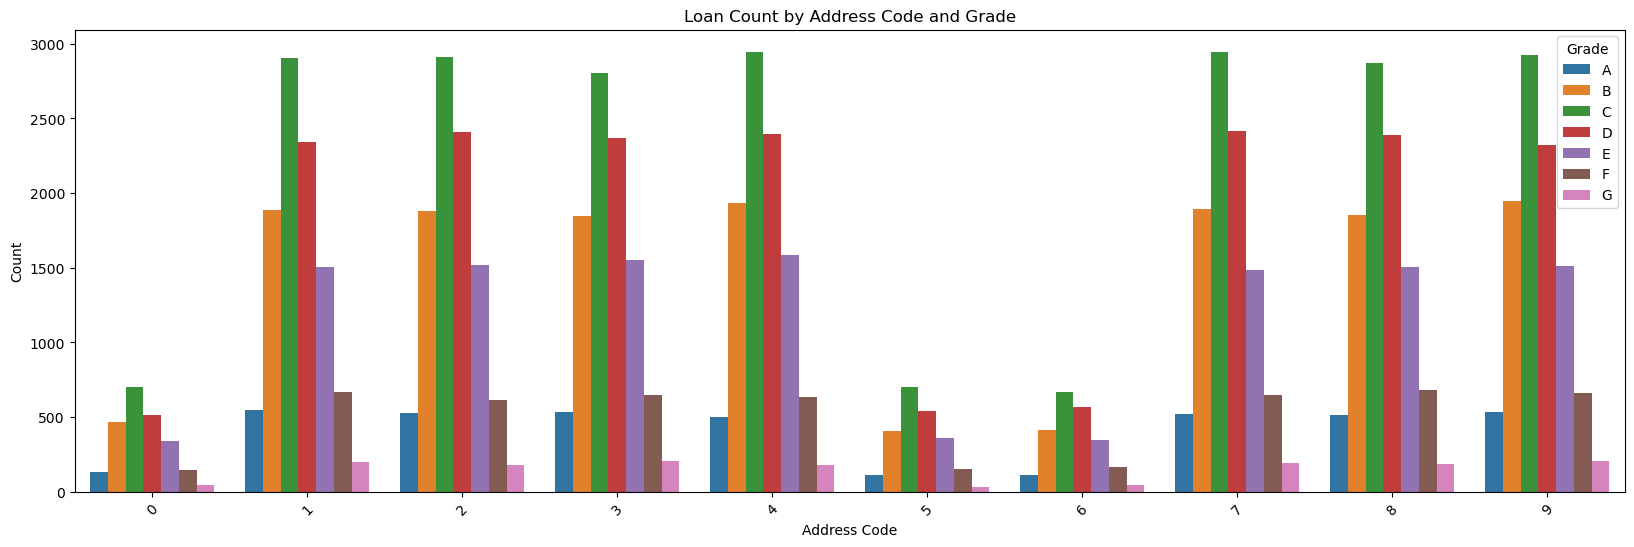

In [765]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
filtered_data = data[data['loan_status'] == 'Charged Off']
grouped = filtered_data.groupby(['address_code', 'grade']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='grade')

plt.title('Loan Count by Address Code and Grade')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Grade', loc='upper right')
plt.show()

## 1번. 지역별 체납자 비율 확인 → 12~13%대를 차지하는 1, 2, 3, 4, 7, 8, 9 지역의 완납/체납자 분포 확인 필요

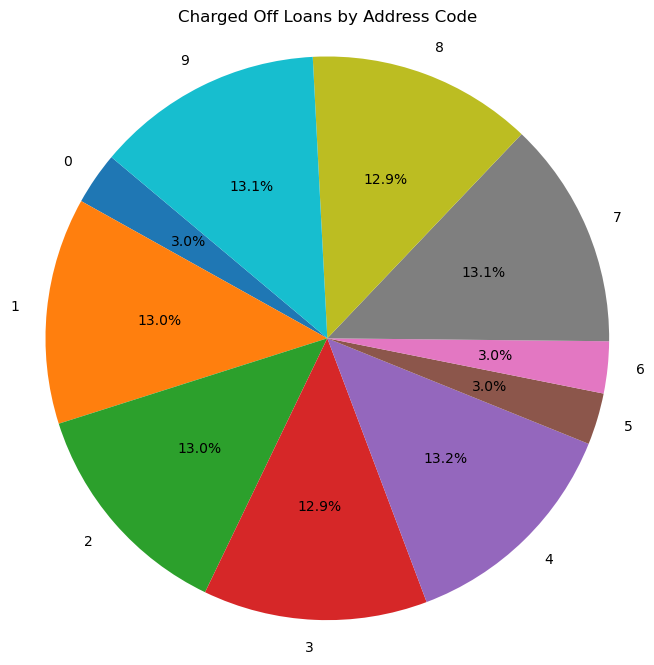

In [766]:
import matplotlib.pyplot as plt

# 체납자(Charged Off)들만 필터링
grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')
charged_off_data = grouped[grouped['loan_status'] == 'Charged Off']

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(charged_off_data['count'], labels=charged_off_data['address_code'], autopct='%1.1f%%', startangle=140)
plt.title('Charged Off Loans by Address Code')
plt.axis('equal')  # 원형으로 조정
plt.show()

## 2번. 1, 2, 3, 4, 7, 8, 9 지역의 완납/체납자 비율 비교 → 1, 8, 9 지역은 체납자 비율이 50% 이상. 이 지역에 사는 사람일수록 체납할 확률이 높다

In [767]:
filtered_data = data[data['address_code'].isin(['1', '2', '3', '4', '7', '8', '9'])]
grouped = filtered_data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')
grouped

,address_code,loan_status,count
0,1,Charged Off,10051
1,1,Fully Paid,9403
2,2,Charged Off,10024
3,2,Fully Paid,73188
4,3,Charged Off,9958
5,3,Fully Paid,41201
6,4,Charged Off,10178
7,4,Fully Paid,40441
8,7,Charged Off,10103
9,7,Fully Paid,41403


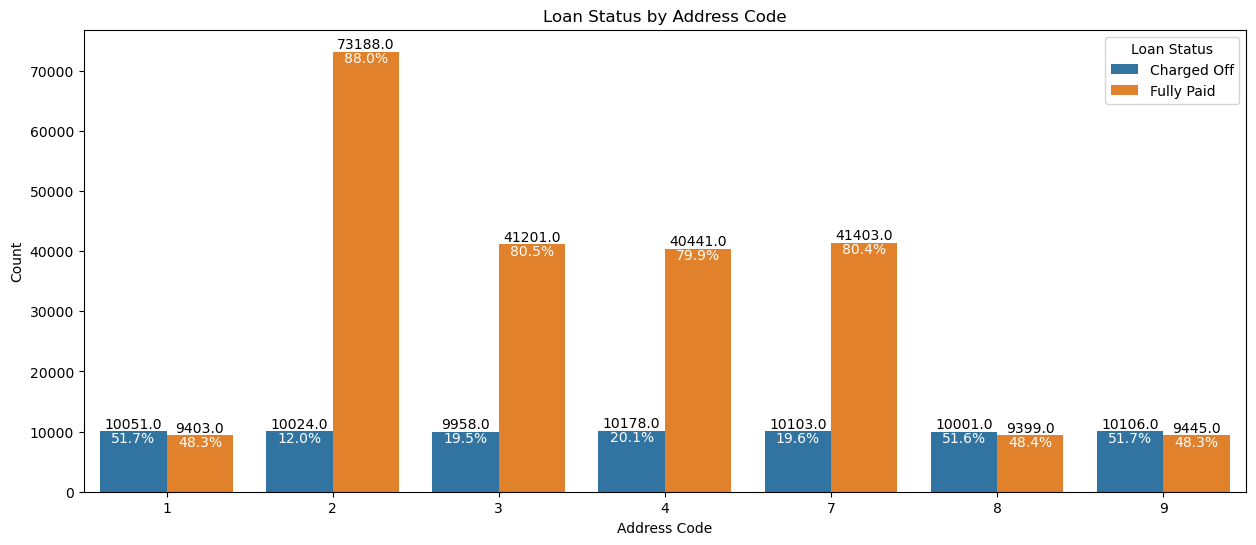

In [768]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 상태로 그룹화하고 크기 계산
filtered_data = data[data['address_code'].isin(['1', '2', '3', '4', '7', '8', '9'])]
grouped = filtered_data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')

totals = []
for i in range(1, 10):
    total = grouped.loc[grouped['address_code'] == f'{i}', 'count'].sum()
    totals.append(total)
# totals 리스트가 10개의 원소를 가지도록 확장
totals = totals * 2
non_zero_totals = [total for total in totals if total != 0]
non_zero_totals
    
# 시각화
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=grouped, x='address_code', y='count', hue='loan_status')

# 막대 위에 빈도수와 퍼센트 표시
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

    # 해당 막대의 비율(백분율) 계산
    total = non_zero_totals[i]
    percentage = height / total * 100

    # 비율(백분율) 표시
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='top', color='white')

plt.title('Loan Status by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

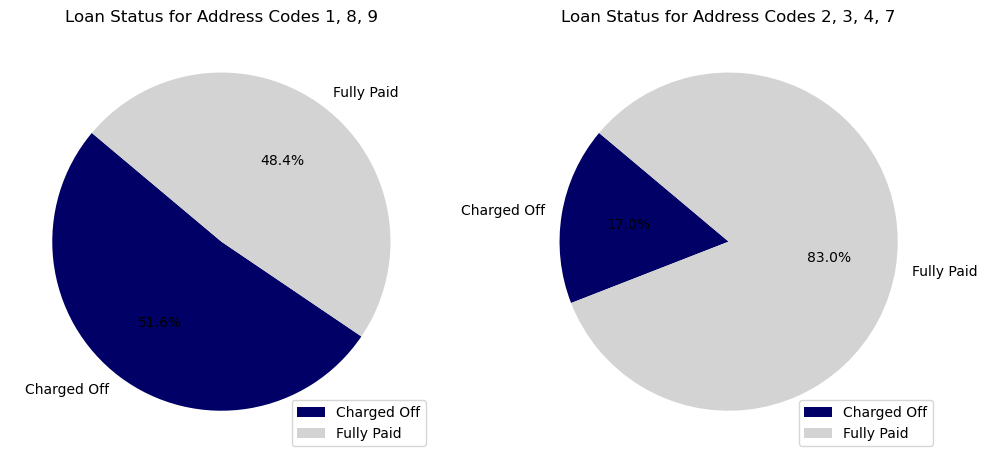

In [810]:
import matplotlib.pyplot as plt

# 주어진 데이터로부터 'address_code'가 1, 8, 9인 그룹과 그 외의 그룹을 분류하여 필터링
filtered_data = data[data['address_code'].isin(['1', '8', '9'])]
grouped_189 = filtered_data.groupby(['loan_status']).size().reset_index(name='count')

filtered_data2 = data[data['address_code'].isin(['2', '3', '4', '7'])]
grouped_others = filtered_data2.groupby(['loan_status']).size().reset_index(name='count')

# 체납 및 완납 비율을 파이 차트로 시각화
labels_189 = grouped_189['loan_status']
sizes_189 = grouped_189['count']
labels_others = grouped_others['loan_status']
sizes_others = grouped_others['count']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['#000066', 'lightgrey']

axs[0].pie(sizes_189, labels=labels_189, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Loan Status for Address Codes 1, 8, 9')
axs[0].legend(labels_189, loc="lower right")

axs[1].pie(sizes_others, labels=labels_others, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Loan Status for Address Codes 2, 3, 4, 7')
axs[1].legend(labels_others, loc="lower right")

plt.show()


## 3번. 지역별 1인당 평균 소득 → 1, 8, 9 지역의 평균 소득이 타 지역에 비해 적다

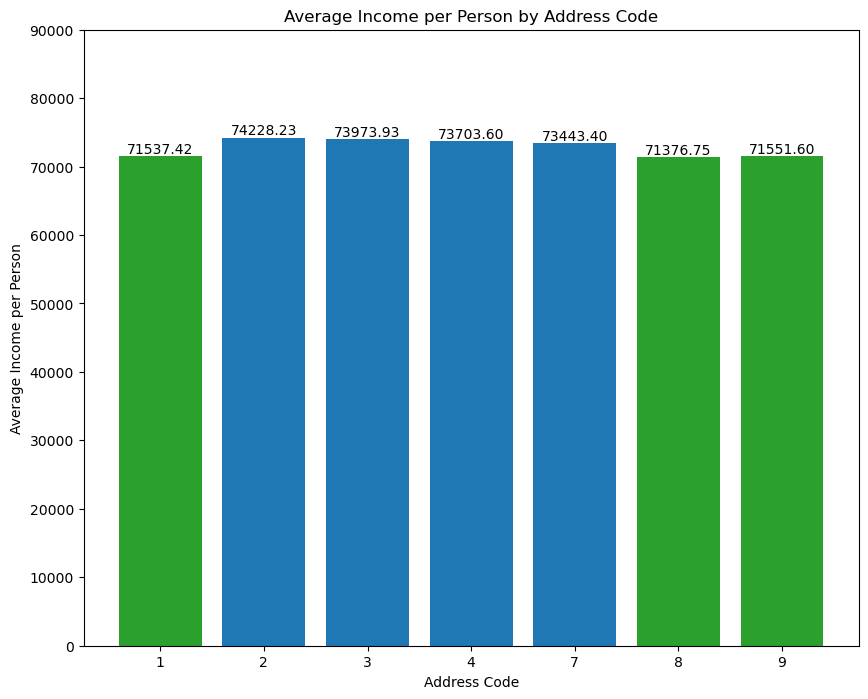

In [770]:
import matplotlib.pyplot as plt

# 주소 코드와 대출 상태로 그룹화하고 크기 계산
filtered_data = data[data['address_code'].isin(['1', '2', '3', '4', '7', '8', '9'])]
grouped = filtered_data.groupby('address_code')['annual_inc'].agg(['sum', 'size']).reset_index()
grouped['average_inc_per_person'] = grouped['sum'] / grouped['size'] 

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(grouped['address_code'], grouped['average_inc_per_person'], color=['tab:blue' if code not in ['1', '8', '9'] else 'tab:green' for code in grouped['address_code']])
plt.title('Average Income per Person by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Average Income per Person')
plt.xticks(rotation=0)
plt.ylim(0, 90000)

# 각 막대 위에 1인당 평균 소득 표시
for bar, height in zip(bars, grouped['average_inc_per_person']):
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


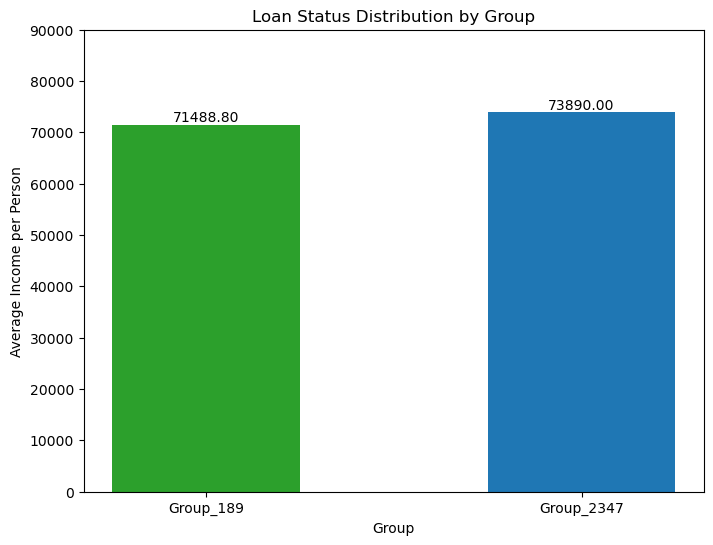

In [771]:
# 1, 8, 9 지역과 2, 3, 4, 7 지역을 묶기
grouped = data.groupby('address_code')['annual_inc'].agg(['sum', 'size']).reset_index()
grouped_189 = grouped[(grouped['address_code'] == '1') | (grouped['address_code'] == '8') | (grouped['address_code'] == '9')]
grouped_2347 = grouped[(grouped['address_code'] == '2') | (grouped['address_code'] == '3') | (grouped['address_code'] == '4') | (grouped['address_code'] == '7')]
grouped_189_list = [grouped_189['sum'].sum(), grouped_189['size'].sum()]
grouped_2347_list = [grouped_2347['sum'].sum(), grouped_2347['size'].sum()]

# 데이터프레임 생성
df = pd.DataFrame({'sum': [grouped_189_list[0], grouped_2347_list[0]], 'size': [grouped_189_list[1], grouped_2347_list[1]]}, index=['Group_189', 'Group_2347'])

plt.figure(figsize=(8, 6))

colors = ['tab:green', 'tab:blue']
bars = plt.bar(df.index, df['sum'] / df['size'], width=0.5, color=colors)
plt.title('Loan Status Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Average Income per Person')
plt.xticks(rotation=0)
plt.ylim(0, 90000)

# 각 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [772]:
grouped_189 = data[(data['address_code'] == '1') | (data['address_code'] == '8') | (data['address_code'] == '9')]['annual_inc'].mean()
grouped_2347 = data[(data['address_code'] == '2') | (data['address_code'] == '3') | (data['address_code'] == '4') | (data['address_code'] == '7')]['annual_inc'].mean()
grouped_2347

73890.00371790642

In [773]:
from scipy import stats

# 두 그룹의 데이터
grouped_189 = data[(data['address_code'] == '1') | (data['address_code'] == '8') | (data['address_code'] == '9')]['annual_inc']
grouped_2347 = data[(data['address_code'] == '2') | (data['address_code'] == '3') | (data['address_code'] == '4') | (data['address_code'] == '7')]['annual_inc']

# 독립표본 T-검정 수행
t_statistic, p_value = stats.ttest_ind(grouped_189, grouped_2347)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# p-value를 이용하여 결과 출력
if p_value < 0.05:
    print("두 그룹 간의 평균 차이가 통계적으로 유의합니다.")
else:
    print("두 그룹 간의 평균 차이가 통계적으로 유의하지 않습니다.")

T-statistic: -9.014171849373707
P-value: 1.995039980626789e-19
두 그룹 간의 평균 차이가 통계적으로 유의합니다.


## 지역 & 근속 기간(emp_length)

In [774]:
grouped = data.groupby(['address_code', 'emp_length']).size().reset_index(name='count')
grouped

,address_code,emp_length,count
0,0,1 year,4963
1,0,10+ years,24433
2,0,2 years,6775
3,0,3 years,6032
4,0,4 years,4493
...,...,...,...
105,9,6 years,1000
106,9,7 years,997
107,9,8 years,1008
108,9,9 years,777


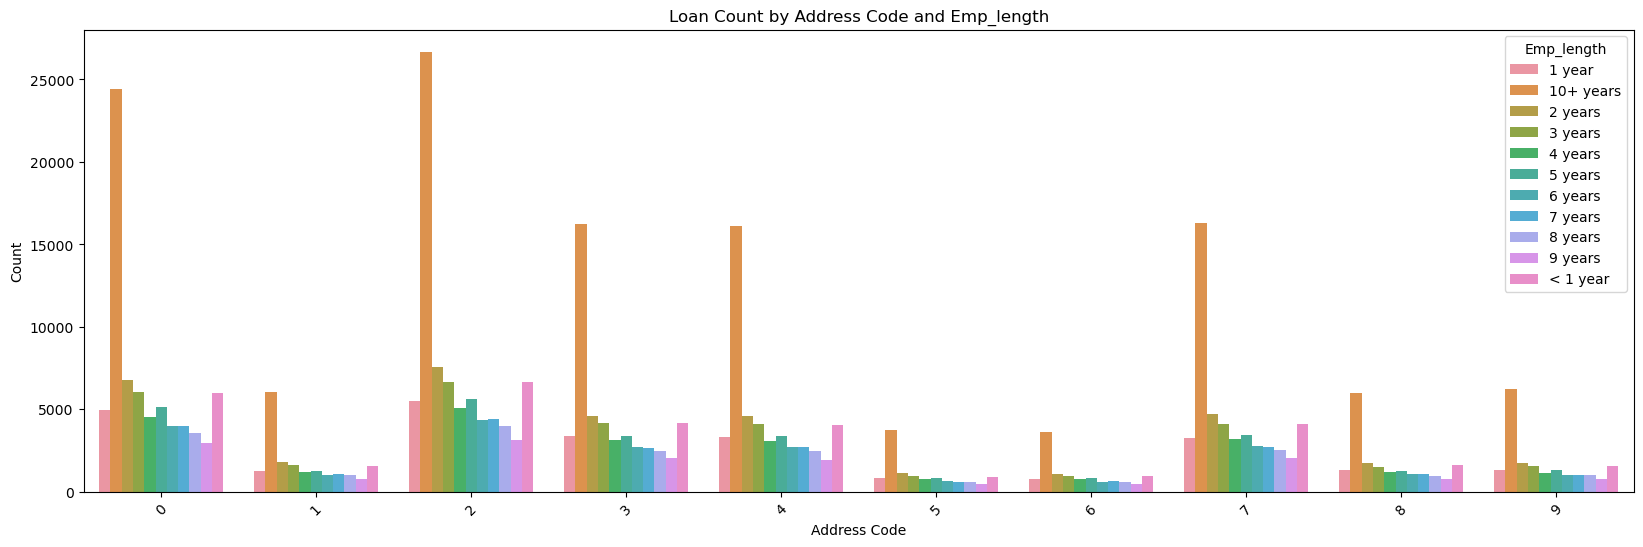

In [775]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
grouped = data.groupby(['address_code', 'emp_length']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='emp_length')

plt.title('Loan Count by Address Code and Emp_length')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Emp_length', loc='upper right')
plt.show()

In [776]:
data['emp_length'].value_counts()

emp_length
10+ years    125299
2 years       35640
3 years       31523
< 1 year      31480
5 years       26391
1 year        25734
4 years       23851
6 years       20753
7 years       20740
8 years       19084
9 years       15242
Name: count, dtype: int64

### 체납자만 확인

In [777]:
filtered_data = data[data['loan_status'] == 'Charged Off']
grouped = filtered_data.groupby(['address_code', 'emp_length']).size().reset_index(name='count')
grouped

,address_code,emp_length,count
0,0,1 year,127
1,0,10+ years,703
2,0,2 years,213
3,0,3 years,163
4,0,4 years,115
...,...,...,...
105,9,6 years,499
106,9,7 years,488
107,9,8 years,524
108,9,9 years,419


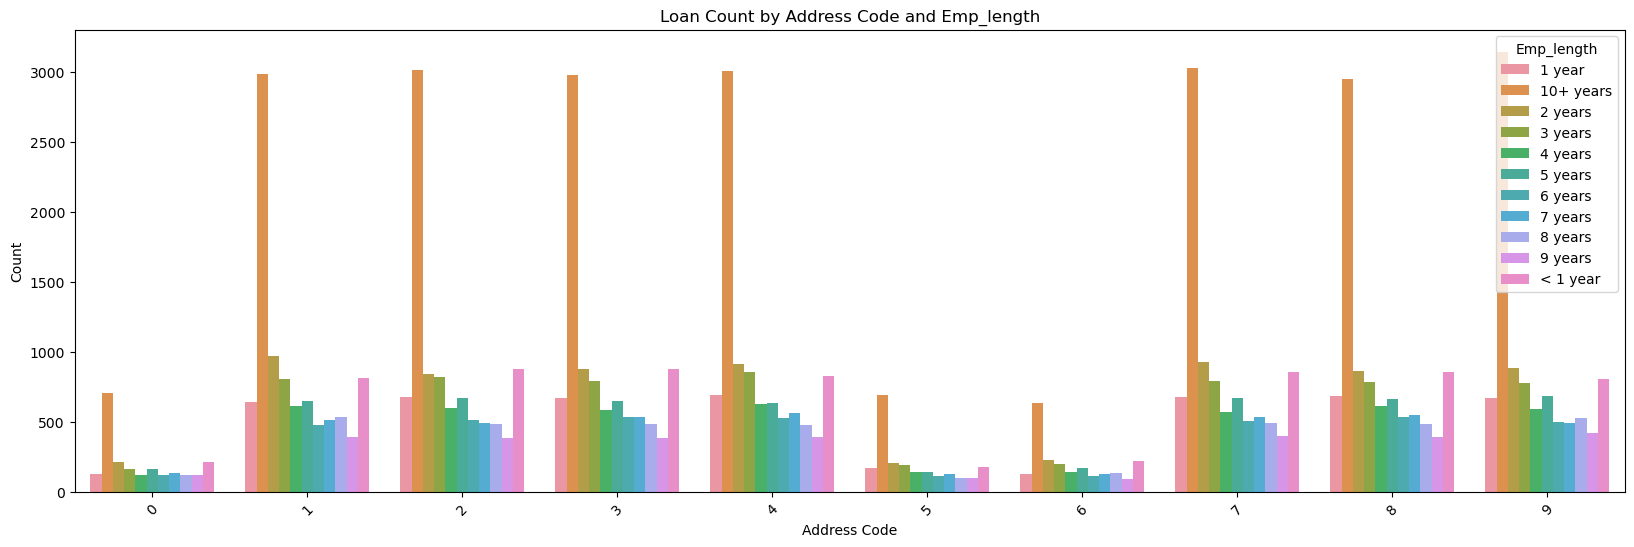

In [778]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
filtered_data = data[data['loan_status'] == 'Charged Off']
grouped = filtered_data.groupby(['address_code', 'emp_length']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='emp_length')

plt.title('Loan Count by Address Code and Emp_length')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Emp_length', loc='upper right')
plt.show()

## 지역 & 자택 소유(home_ownership) → 타 지역에 비해 0, 2 지역이 자가를 소유한 사람이 많음

In [779]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    197069
RENT        159323
OWN          37447
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [780]:
grouped = data.groupby(['address_code', 'home_ownership']).size().reset_index(name='count')
grouped

,address_code,home_ownership,count
0,0,ANY,1
1,0,MORTGAGE,38799
2,0,NONE,6
3,0,OTHER,21
4,0,OWN,7025
5,0,RENT,29621
6,1,MORTGAGE,9213
7,1,NONE,3
8,1,OTHER,7
9,1,OWN,1891


In [781]:
filtered_data = data[data['home_ownership'].isin(['MORTGAGE', 'OWN', 'RENT'])]
grouped = filtered_data.groupby(['address_code', 'home_ownership']).size().reset_index(name='count')
grouped

,address_code,home_ownership,count
0,0,MORTGAGE,38799
1,0,OWN,7025
2,0,RENT,29621
3,1,MORTGAGE,9213
4,1,OWN,1891
5,1,RENT,8340
6,2,MORTGAGE,42216
7,2,OWN,7933
8,2,RENT,33040
9,3,MORTGAGE,25528


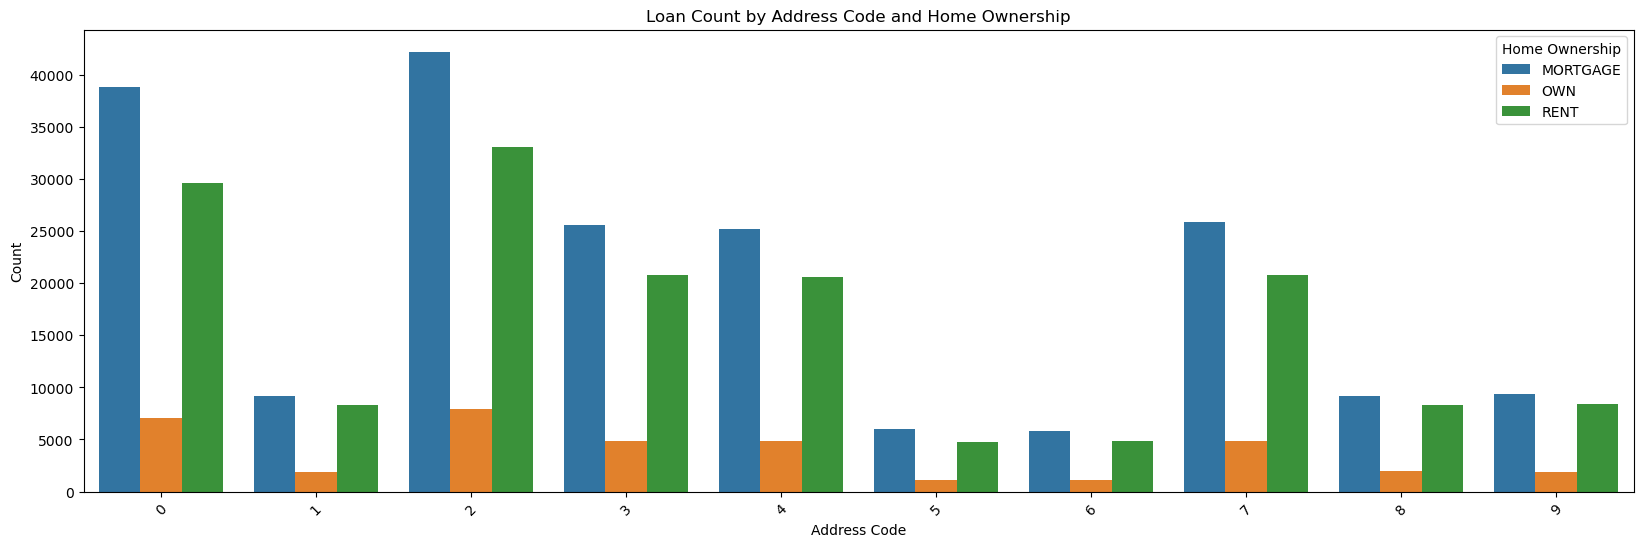

In [782]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
grouped = filtered_data.groupby(['address_code', 'home_ownership']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='home_ownership')

plt.title('Loan Count by Address Code and Home Ownership')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Home Ownership', loc='upper right')
plt.show()

### 체납자의 자택 소유 

In [783]:
filtered_data = data[(data['loan_status'] == 'Charged Off') & data['home_ownership'].isin(['MORTGAGE', 'OWN', 'RENT'])]
grouped = filtered_data.groupby(['address_code', 'home_ownership']).size().reset_index(name='count')
grouped

,address_code,home_ownership,count
0,0,MORTGAGE,1053
1,0,OWN,199
2,0,RENT,1082
3,1,MORTGAGE,4353
4,1,OWN,1020
5,1,RENT,4676
6,2,MORTGAGE,4348
7,2,OWN,1016
8,2,RENT,4657
9,3,MORTGAGE,4281


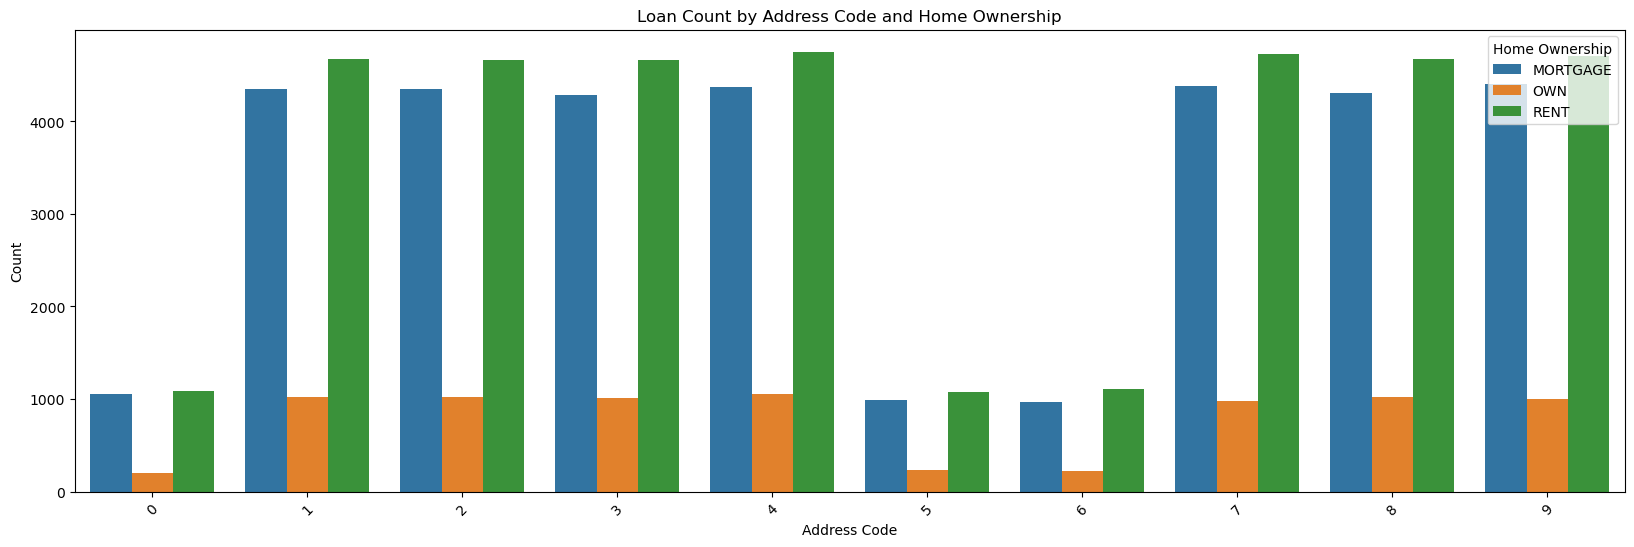

In [784]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
filtered_data = data[(data['loan_status'] == 'Charged Off') & data['home_ownership'].isin(['MORTGAGE', 'OWN', 'RENT'])]
grouped = filtered_data.groupby(['address_code', 'home_ownership']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='address_code', y='count', hue='home_ownership')

plt.title('Loan Count by Address Code and Home Ownership')
plt.xlabel('Address Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Home Ownership', loc='upper right')
plt.show()

# 리볼빙 한도와 연간소득 → 연간 소득이 낮을수록 리볼빙 한도도 낮음(당연..)

In [785]:
data['revol_bal'].describe()

count    393981.000000
mean      15166.787822
std       14790.116184
min           0.000000
25%        6023.000000
50%       11154.000000
75%       19517.000000
max      155375.000000
Name: revol_bal, dtype: float64

In [786]:
# 데이터프레임에 새로운 열 '연간 소득'을 추가
data['리볼빙 한도'] = pd.qcut(data['revol_bal'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 결과 확인
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,total_amnt,연간 소득,Zipcode,address_code,리볼빙 한도
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",11861.28,Q4,22690,2,Q4
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",9564.48,Q3,05113,0,Q4
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",18250.92,Q1,87025,8,Q3
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",7943.40,Q2,00813,0,Q1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",36559.80,Q2,11650,1,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",13042.80,Q1,12951,1,Q1
393977,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",25215.12,Q4,05113,0,Q4
393978,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",5807.52,Q2,70466,7,Q4
393979,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",30181.20,Q2,29597,2,Q3


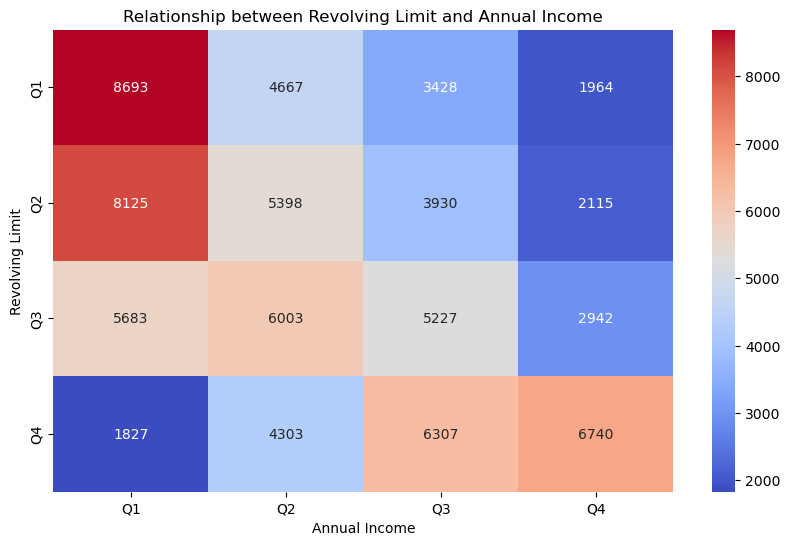

In [787]:
import seaborn as sns
import pandas as pd

# 교차표 생성
charged_off_data = data[data['loan_status'] == 'Charged Off']
cross_table = pd.crosstab(charged_off_data['리볼빙 한도'], charged_off_data['연간 소득'])

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Revolving Limit and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Limit')
plt.show()

# 리볼빙 한도 사용 비율

- 일반적으로 많은 연구에서는 대출 한도를 많이 사용하는 고객이 더 높은 체납률을 보일 수 있다는 연구 결과가 나오기도 함
- 리볼빙 한도를 많이 사용하는 고객이 더 많은 부채를 갖고 있을 가능성이 있으며, 이로 인해 대출을 상환하는 데 어려움을 겪을 수 있기 때문

In [788]:
data['revol_util'].describe()

count    393981.000000
mean         53.784516
std          24.394184
min           0.000000
25%          35.900000
50%          54.800000
75%          72.800000
max         153.000000
Name: revol_util, dtype: float64

In [789]:
# 'revol_util' 열을 기준으로 데이터를 세 개의 구간으로 나누기
data['리볼빙 사용 비율'] = pd.qcut(data['revol_util'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

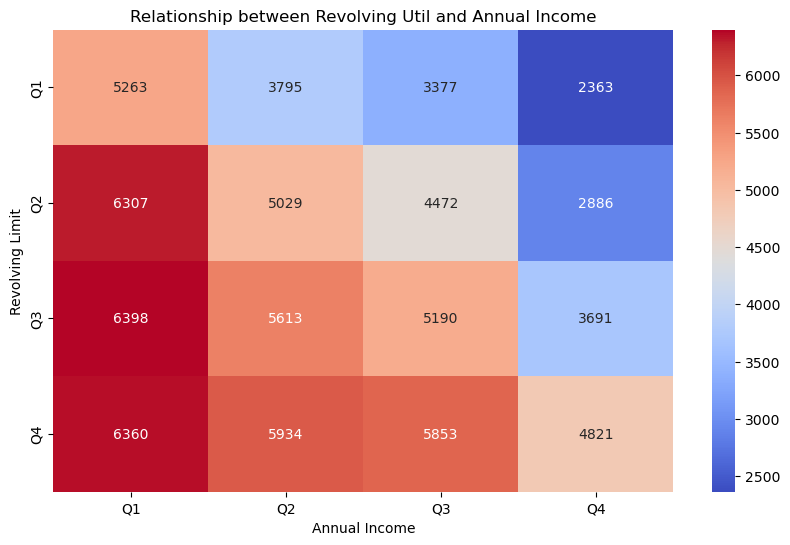

In [790]:
import seaborn as sns
import pandas as pd

# 교차표 생성
charged_off_data = data[data['loan_status'] == 'Charged Off']
cross_table = pd.crosstab(charged_off_data['리볼빙 사용 비율'], charged_off_data['연간 소득'])

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Revolving Util and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Limit')
plt.show()

# 지역 & 리볼빙 한도 사용 비율

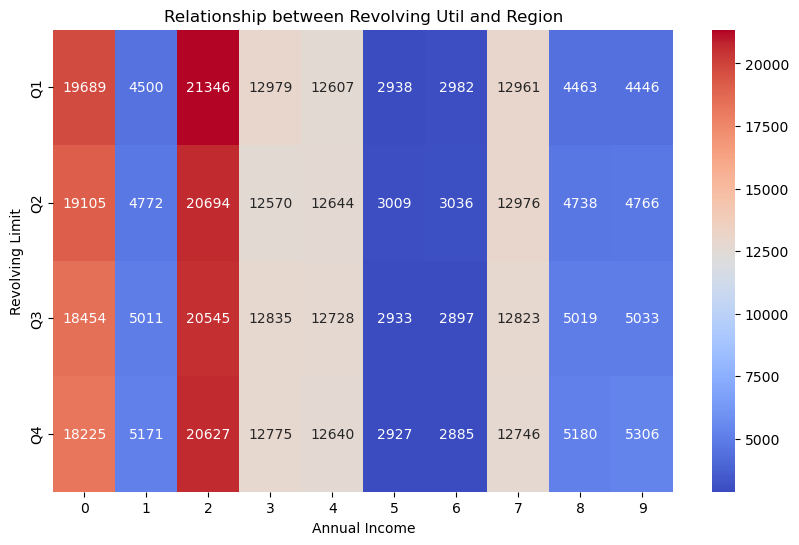

In [791]:
# 교차표 생성
cross_table = pd.crosstab(data['리볼빙 사용 비율'], data['address_code'])

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Revolving Util and Region')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Limit')
plt.show()

# 이자율에 따른 체납 여부 → 이자율이 높을수록 체납자가 많음

In [792]:
data['int_rate']

0         11.44
1         11.99
2         10.49
3          6.49
4         17.27
          ...  
393976    10.99
393977    12.29
393978     9.99
393979    15.31
393980    13.61
Name: int_rate, Length: 393981, dtype: float64

In [793]:
# 데이터프레임에 새로운 열 '연간 소득'을 추가
data['이자율'] = pd.qcut(data['int_rate'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 결과 확인
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,mort_acc,pub_rec_bankruptcies,address,total_amnt,연간 소득,Zipcode,address_code,리볼빙 한도,리볼빙 사용 비율,이자율
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",11861.28,Q4,22690,2,Q4,Q2,Q2
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",9564.48,Q3,05113,0,Q4,Q2,Q2
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",18250.92,Q1,87025,8,Q3,Q4,Q1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",7943.40,Q2,00813,0,Q1,Q1,Q1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",36559.80,Q2,11650,1,Q4,Q3,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",13042.80,Q1,12951,1,Q1,Q1,Q2
393977,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",25215.12,Q4,05113,0,Q4,Q4,Q2
393978,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",5807.52,Q2,70466,7,Q4,Q3,Q1
393979,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",30181.20,Q2,29597,2,Q3,Q2,Q3


In [794]:
data['이자율'].value_counts()

이자율
Q3    99683
Q1    99602
Q2    98789
Q4    95907
Name: count, dtype: int64

In [795]:
grouped = data.groupby(['이자율', 'loan_status']).size().reset_index(name='count')
grouped

,이자율,loan_status,count
0,Q1,Charged Off,8014
1,Q1,Fully Paid,91588
2,Q2,Charged Off,15069
3,Q2,Fully Paid,83720
4,Q3,Charged Off,22209
5,Q3,Fully Paid,77474
6,Q4,Charged Off,32060
7,Q4,Fully Paid,63847


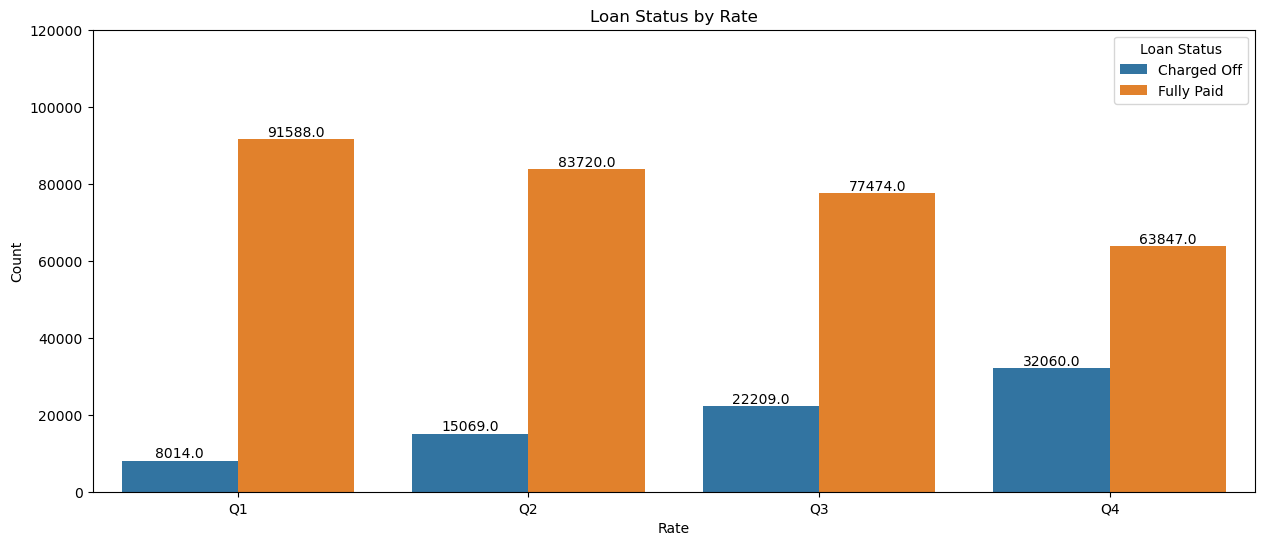

In [796]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 상태로 그룹화하고 크기 계산
grouped = data.groupby(['이자율', 'loan_status']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=grouped, x='이자율', y='count', hue='loan_status')

# 막대 위에 빈도수와 퍼센트 표시
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Loan Status by Rate')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper right')
plt.ylim(0, 120000)
plt.show()

## 대출 이자율 별 체납자 비율

In [797]:
charged_off_grouped1 = data[data['loan_status'] == 'Charged Off'].groupby('이자율').size().reset_index(name='count')
charged_off_grouped1['count'].sum()

77352

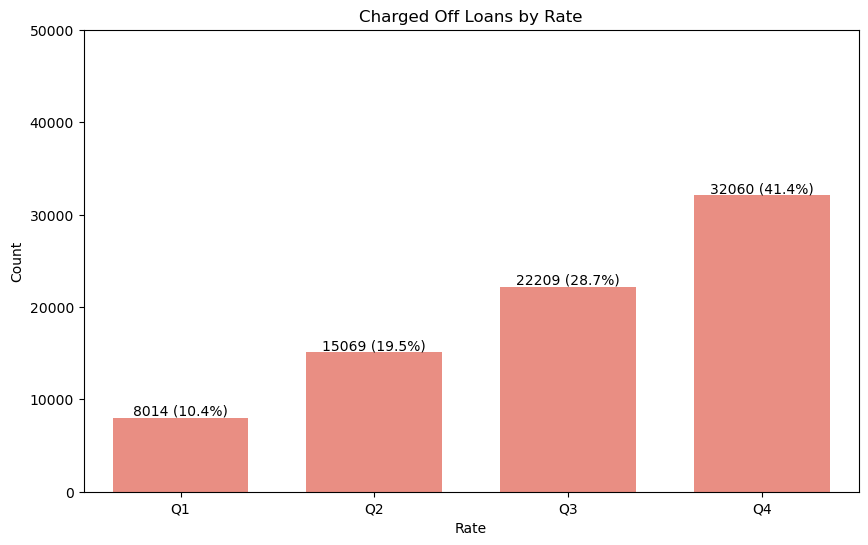

In [798]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'loan_status'가 'Charged Off'인 경우만 필터링하여 그룹화하고 크기를 계산
charged_off_grouped1 = data[data['loan_status'] == 'Charged Off'].groupby('이자율').size().reset_index(name='count')

# Charged Off 대출 총합 구하기
total_charged_off = charged_off_grouped1['count'].sum()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=charged_off_grouped1, x='이자율', y='count', color='salmon', width=0.7)

# 빈도수와 비율 표시
for index, row in charged_off_grouped1.iterrows():
    percentage = row['count'] / total_charged_off * 100
    plt.text(index, row['count'], f'{row["count"]} ({percentage:.1f}%)',
             color='black', ha="center", va="bottom")

plt.title('Charged Off Loans by Rate')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.ylim(0, 50000)
plt.show()

# 등급 & 이자율 → 등급이 낮을수록 이자율이 높음

In [799]:
grouped = data.groupby(['grade', '이자율']).size().reset_index(name='count')
grouped

,grade,이자율,count
0,A,Q1,63772
1,A,Q2,0
2,A,Q3,0
3,A,Q4,0
4,B,Q1,35787
5,B,Q2,72920
6,B,Q3,6782
7,B,Q4,0
8,C,Q1,15
9,C,Q2,25815


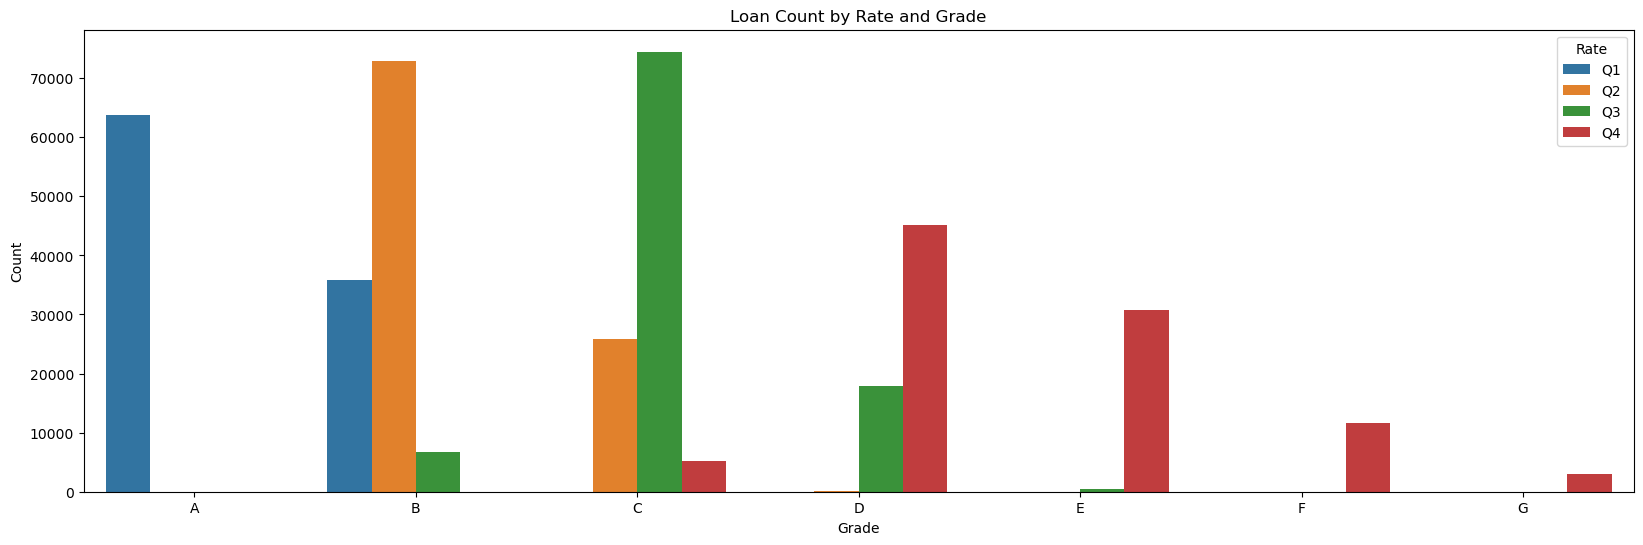

In [800]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 주소 코드와 대출 등급으로 그룹화하고 크기 계산
grouped = data.groupby(['grade', '이자율']).size().reset_index(name='count')

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(data=grouped, x='grade', y='count', hue='이자율')

plt.title('Loan Count by Rate and Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Rate', loc='upper right')
plt.show()

In [801]:
filtered_data = data[(data['address_code'] == '1')|(data['address_code'] == '8')|(data['address_code'] == '9')]
grouped = filtered_data['home_ownership'].value_counts().reset_index(name='count')


# 체납자/완납자 1인당 평균 소득

In [802]:
data[data['loan_status'] == 'Charged Off']['annual_inc'].mean()
data[data['loan_status'] == 'Fully Paid']['annual_inc'].mean()

75364.12545458564

In [803]:
from scipy import stats

# 두 그룹의 데이터
grouped_charged_off = data[data['loan_status'] == 'Charged Off']['annual_inc']
grouped_fully_paid = data[data['loan_status'] == 'Fully Paid']['annual_inc']

# 독립표본 T-검정 수행
t_statistic, p_value = stats.ttest_ind(grouped_charged_off, grouped_fully_paid)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# p-value를 이용하여 결과 출력
if p_value < 0.05:
    print("두 그룹 간의 평균 차이가 통계적으로 유의합니다.")
else:
    print("두 그룹 간의 평균 차이가 통계적으로 유의하지 않습니다.")

T-statistic: -33.58934058412665
P-value: 5.3836455506930025e-247
두 그룹 간의 평균 차이가 통계적으로 유의합니다.


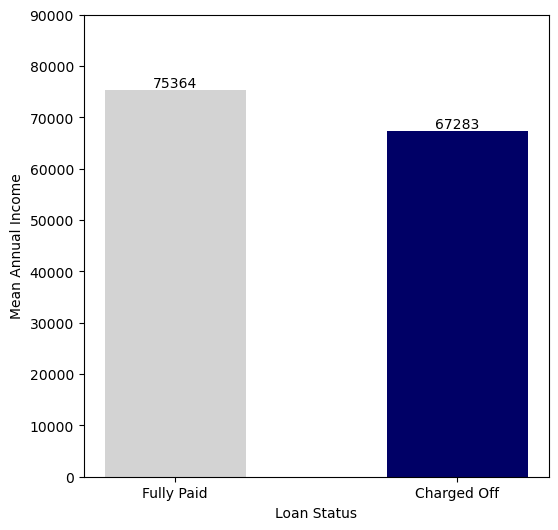

In [804]:
import matplotlib.pyplot as plt

# Calculate mean annual income for Charged Off and Fully Paid loans
charged_off_mean = data[data['loan_status'] == 'Charged Off']['annual_inc'].mean()
fully_paid_mean = data[data['loan_status'] == 'Fully Paid']['annual_inc'].mean()

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(['Fully Paid', 'Charged Off'], [fully_paid_mean, charged_off_mean, ], color=['lightgray', '#000066'], width=0.5)
plt.xlabel('Loan Status')
plt.ylim(0, 90000)
plt.ylabel('Mean Annual Income')
# plt.title('Mean Annual Income by Loan Status')

# Add annotations for mean values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height()), ha='center', va='bottom')

plt.show()

# 연간소득을 카테고리컬하게 바꾸고 파이차트로 확인

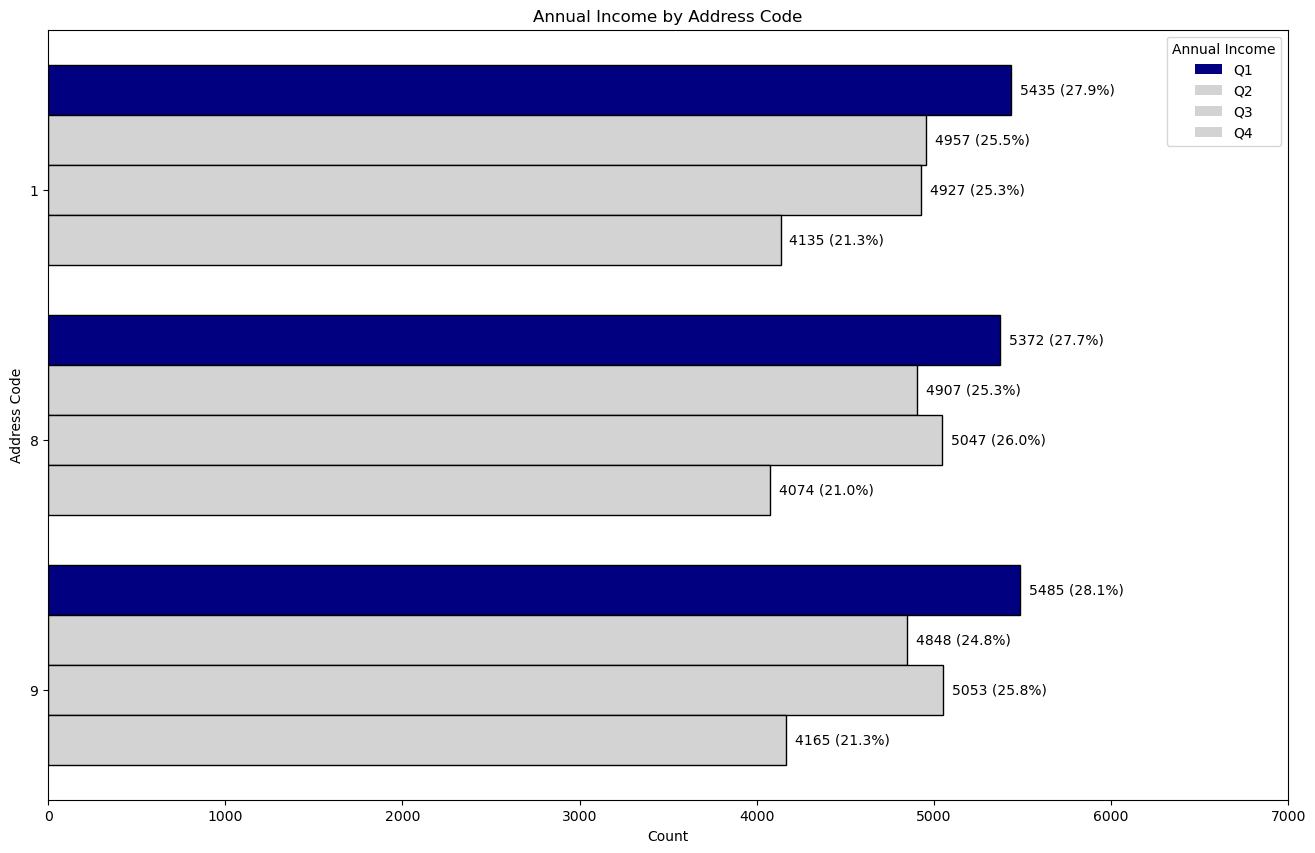

In [805]:
import matplotlib.pyplot as plt
import numpy as np

filtered_data1 = data[data['address_code'] == '1']['연간 소득'].value_counts().reset_index(name='count')
filtered_data1['address_code'] = 1

filtered_data8 = data[data['address_code'] == '8']['연간 소득'].value_counts().reset_index(name='count')
filtered_data8['address_code'] = 8

filtered_data9 = data[data['address_code'] == '9']['연간 소득'].value_counts().reset_index(name='count')
filtered_data9['address_code'] = 9

combined_data = pd.concat([filtered_data1, filtered_data8, filtered_data9])

# Prepare data for plotting
income_categories = combined_data['연간 소득'].unique()
address_codes = combined_data['address_code'].unique()

# Set the width of the bars
bar_width = 0.2

# Plot
plt.figure(figsize=(16, 10))

for i, income_category in enumerate(income_categories):
    for j, address_code in enumerate(address_codes):
        count = combined_data[(combined_data['address_code'] == address_code) & (combined_data['연간 소득'] == income_category)]['count'].iloc[0]
        total_count = combined_data[combined_data['address_code'] == address_code]['count'].sum()
        percentage = count / total_count * 100 if total_count != 0 else 0
        
        if income_category == 'Q1': # Q1 is navy
            color = 'navy'
        else: # Q2, Q3, Q4 are light grey
            color = 'lightgrey'
        
        plt.barh(j + (bar_width * i), count, height=bar_width, color=color, edgecolor='black', linewidth=1)
        
        # Add annotations for counts and percentages next to each bar
        plt.text(count + 50, j + (bar_width * i), f'{count} ({percentage:.1f}%)', va='center')

plt.ylabel('Address Code')
plt.xlabel('Count')
plt.xlim(0, 7000)
plt.title('Annual Income by Address Code')
plt.yticks(np.arange(len(address_codes)) + bar_width * (len(income_categories) / 2), address_codes)
plt.gca().invert_yaxis()  # Invert y-axis to have higher address code at the top
# Create custom legend handles with appropriate colors
legend_labels = ['Q1', 'Q2', 'Q3', 'Q4']
legend_handles = [plt.bar(0, 0, color='navy'), plt.bar(0, 0, color='lightgrey'), plt.bar(0, 0, color='lightgrey'), plt.bar(0, 0, color='lightgrey')]

plt.legend(legend_handles, legend_labels, title='Annual Income')

plt.show()


# 1, 8, 9 지역 & 2, 3, 4, 7 지역 연간소득 비교

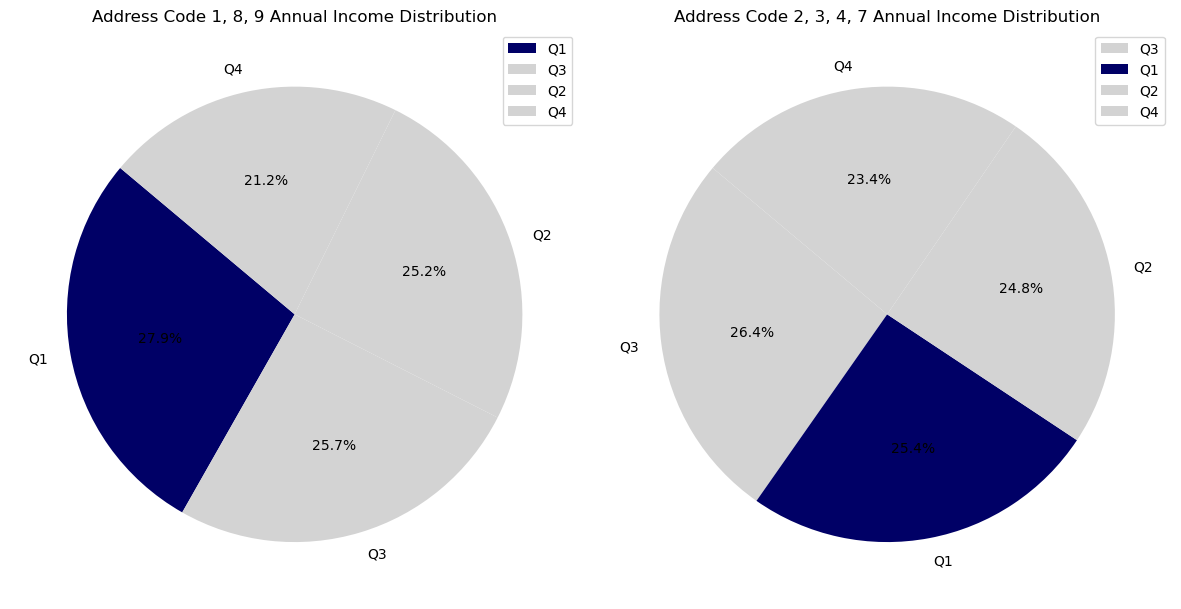

In [806]:
import matplotlib.pyplot as plt

# 데이터 예시 (filtered_data189, filtered_data2347 대신 실제 데이터를 사용)
filtered_data189 = data[(data['address_code'] == '1')|(data['address_code'] == '8')|(data['address_code'] == '9')]['연간 소득'].value_counts().reset_index(name='count')
filtered_data2347 = data[(data['address_code'] == '2')|(data['address_code'] == '3')|(data['address_code'] == '4')|(data['address_code'] == '7')]['연간 소득'].value_counts().reset_index(name='count') 

# 그림 생성
plt.figure(figsize=(12, 6))

# 첫 번째 서브플롯
plt.subplot(1, 2, 1)
colors189 = ['#000066' if i == 0 else 'lightgrey' for i in range(len(filtered_data189))]
plt.pie(filtered_data189['count'], labels=filtered_data189['연간 소득'], autopct='%1.1f%%', startangle=140, colors=colors189)
plt.title('Address Code 1, 8, 9 Annual Income Distribution')
plt.legend(filtered_data189['연간 소득'], loc='upper right')

# 두 번째 서브플롯
plt.subplot(1, 2, 2)
colors2347 = ['#000066' if i == 1 else 'lightgrey' for i in range(len(filtered_data2347))]
plt.pie(filtered_data2347['count'], labels=filtered_data2347['연간 소득'], autopct='%1.1f%%', startangle=140, colors=colors2347)
plt.title('Address Code 2, 3, 4, 7 Annual Income Distribution')
plt.legend(filtered_data2347['연간 소득'], loc='upper right')

plt.tight_layout()
plt.show()

In [807]:
data['annual_inc'].describe()

count    3.939810e+05
mean     7.377754e+04
std      6.007026e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

## 두 그룹 간의 차이가 통계적으로 유의미한가?

- 실제 데이터가 구간화된 명목형 변수인 경우, 각 구간의 대표값으로 중간값을 사용하는 것이 일반적(구간의 중간값이 해당 구간의 대표값으로 가장 자연스러운 선택이기 때문)
- 구간화된 명목형 변수의 경우에는 각 구간의 범위가 있고, 이 범위 내에서는 데이터가 연속적인 수치로 측정되지 않음. 따라서 각 구간의 대표값으로서 중간값을 선택하는 것은 해당 구간을 가장 잘 나타내는 선택이 될 수 있음

In [808]:
q1 = data['annual_inc'].quantile(0.25) 
q2 = data['annual_inc'].quantile(0.5) 
q3 = data['annual_inc'].quantile(0.75) 
q4 = data['annual_inc'].quantile(1) 

m_q1 = int(q1/2)
m_q2 = int((q1+1+q2)/2)
m_q3 = int((q2+1+q3)/2)
m_q4 = int((q3+1+q4)/2)
print(f'Q1 중간값: {m_q1}')
print(f'Q2 중간값: {m_q2}')
print(f'Q3 중간값: {m_q3}')
print(f'Q4 중간값: {m_q4}')

Q1 중간값: 22500
Q2 중간값: 54500
Q3 중간값: 77000
Q4 중간값: 4398291


In [809]:
import pandas as pd
from scipy import stats

# '연간 소득' 구간화 데이터를 수치형으로 변환
income_mapping = {'Q1': m_q1, 'Q2': m_q2, 'Q3': m_q3, 'Q4':m_q4}  # 각 구간의 중간값으로 대체
data['연간 소득'] = data['연간 소득'].map(income_mapping)

# 두 그룹의 데이터 추출
group1 = data[(data['address_code'] == '1') | (data['address_code'] == '8') | (data['address_code'] == '9')]['연간 소득']
group2 = data[(data['address_code'] == '2') | (data['address_code'] == '3') | (data['address_code'] == '4') | (data['address_code'] == '7')]['연간 소득']

# 독립 표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서 검정
alpha = 0.05
if p_value < alpha:
    print("통계적으로 유의미한 차이가 있습니다.")
else:
    print("통계적으로 유의미한 차이가 없습니다.")


t-statistic: -11.72759157019954
p-value: 9.354950878241784e-32
통계적으로 유의미한 차이가 있습니다.
